In [170]:
import sys, os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')


font = {'size'   : 8}
plt.rc('font', **font)
plt.rcParams['pdf.fonttype'] = 42

In [171]:
maf = pd.read_csv('../data/single_crypt/FAP03_sgWGS_maf_all_SSNVs_consensus_filtered.csv', sep=',')

maf['Region'] = maf['Tumor_Sample_Label'].apply(lambda x: x.split('_')[1])
maf['Sam_Type'] = maf['Tumor_Sample_Label'].apply(lambda x: x.split('_')[0])

print(maf['Tumor_Sample_Barcode'].unique())

print(f'Total mutations all glands: {maf.shape[0]}')

maf['Mut_ID'] = maf['Chromosome'] + '_' + maf['Start_Position'].astype('str') + '_' + maf['End_Position'].astype('str') + '_' + maf['Reference_Allele'] + '_' + maf['Tumor_Seq_Allele2'] + '_' + maf['Hugo_Symbol']

# Remove all samples that are normal
maf_no_norm = maf[~maf['Sam_Type'].str.contains('N2')]
print("Polyp crypts: ", maf_no_norm['Tumor_Sample_Barcode'].unique().shape[0])


samples = maf_no_norm['Tumor_Sample_Barcode'].unique().shape[0]

# Get matrix of 1 and 0 for each mutation in each sample (1 if mutation is present, 0 if not)
mat = maf_no_norm.pivot_table(index='Mut_ID', columns='Tumor_Sample_Barcode', values='VAF', aggfunc='count', fill_value=0)

# sort by the sum of the row to get the most common mutations at the top
mat = mat.loc[mat.sum(axis=1).sort_values(ascending=False).index]

print(samples)
print(mat.sum(axis=1).shape[0])

x = []
y = []
for i in range(1, samples+1):
    x.append(i)
    print(i, mat.sum(axis=1)[mat.sum(axis=1)==i].shape[0])
    y.append(mat.sum(axis=1)[mat.sum(axis=1)==i].shape[0])
# print(mat.sum(axis=1)[mat.sum(axis=1)==22].shape[0])

# Print private, shared, and ubiquitious (in all samples)
sum_of_samples_per_mut = mat.sum(axis=1)

total_samples = len(maf['Tumor_Sample_Barcode'].unique())

private = sum_of_samples_per_mut[sum_of_samples_per_mut == 1].shape[0]

shared = sum_of_samples_per_mut[sum_of_samples_per_mut > 1].shape[0]

ubiquitous = sum_of_samples_per_mut[sum_of_samples_per_mut == total_samples].shape[0]

shared = shared - ubiquitous # Remove the ubiquitous mutations from the shared count so we don't con't twice

# print(f'Total mutations: {maf.shape[0]}')
print(f'Total unique SNP mutations: {mat.shape[0]}')
print(f'Private: {private} ({private/mat.shape[0]}%)')
print(f'Shared: {shared} ({shared/mat.shape[0]}%)')
print(f'Ubiquitous: {ubiquitous} ({ubiquitous/mat.shape[0]}%)')

['FAP03_N2_R2_G4' 'FAP03_N2_R2_G5' 'FAP03_N2_R3_G1' 'FAP03_P2_R1_G3'
 'FAP03_P2_R1_G4' 'FAP03_P2_R1_G8' 'FAP03_P2_R1_G9' 'FAP03_P2_R2_G3'
 'FAP03_P2_R2_G4' 'FAP03_P2_R2_G5' 'FAP03_P2_R2_G7' 'FAP03_P2_R3_G1'
 'FAP03_P2_R3_G2' 'FAP03_P2_R4_G1' 'FAP03_P2_R4_G11' 'FAP03_P2_R4_G3'
 'FAP03_P2_R4_G6' 'FAP03_P2_R4_G7' 'FAP03_P2_R5_G12' 'FAP03_P2_R5_G5'
 'FAP03_P2_R5_G9' 'FAP03_P2_R6_G1' 'FAP03_P2_R6_G13' 'FAP03_P2_R6_G3'
 'FAP03_P2_R6_G6' 'FAP03_P2_R6_G7' 'FAP03_P2_R6_G8']
Total mutations all glands: 83618
Polyp crypts:  24
24
57188
1 46109
2 6897
3 1041
4 654
5 1515
6 395
7 272
8 122
9 51
10 30
11 22
12 19
13 11
14 6
15 4
16 7
17 2
18 2
19 6
20 5
21 9
22 9
23 0
24 0
Total unique SNP mutations: 57188
Private: 46109 (0.806270546268448%)
Shared: 11079 (0.19372945373155206%)
Ubiquitous: 0 (0.0%)


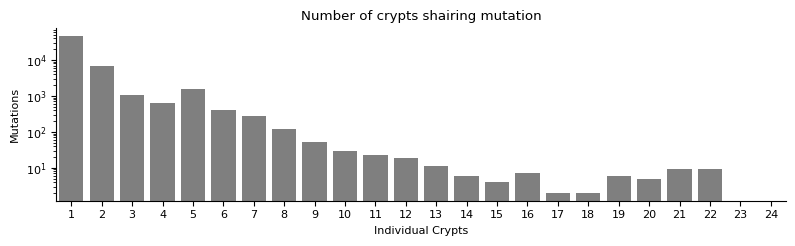

In [172]:
fig, ax = plt.subplots(1,1,figsize=(8,2.5))
sns.barplot(x=x, y=y, color='black', alpha=0.5, ax=ax)
sns.despine()
plt.yscale('log')
plt.xlabel('Individual Crypts')
plt.ylabel('Mutations')
plt.title('Number of crypts sharing mutation')
plt.tight_layout()
plt.savefig('./imgs/mutations_per_crypt_all_regions.pdf')
plt.show()

# Region R4

['FAP03_P2_R4_G1' 'FAP03_P2_R4_G11' 'FAP03_P2_R4_G3' 'FAP03_P2_R4_G6'
 'FAP03_P2_R4_G7']
Total mutations all glands: 20213
Polyp crypts:  5
5
13482
1 11000
2 857
3 158
4 310
5 1157
Total unique SNP mutations: 13482
Private: 11000 (0.8159026850615636%)
Shared: 1325 (0.09827918706423379%)
Ubiquitous: 1157 (0.08581812787420263%)


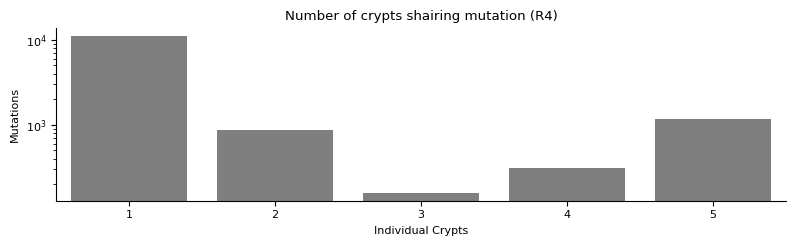

In [173]:
maf = pd.read_csv('../data/single_crypt/FAP03_sgWGS_maf_all_SSNVs_consensus_filtered.csv', sep=',')
maf['Region'] = maf['Tumor_Sample_Label'].apply(lambda x: x.split('_')[1])
maf['Sam_Type'] = maf['Tumor_Sample_Label'].apply(lambda x: x.split('_')[0])

maf = maf[maf['Region']=='R4']
print(maf['Tumor_Sample_Barcode'].unique())

print(f'Total mutations all glands: {maf.shape[0]}')

maf['Mut_ID'] = maf['Chromosome'] + '_' + maf['Start_Position'].astype('str') + '_' + maf['End_Position'].astype('str') + '_' + maf['Reference_Allele'] + '_' + maf['Tumor_Seq_Allele2'] + '_' + maf['Hugo_Symbol']

# Remove all samples that are normal
maf_no_norm = maf[~maf['Sam_Type'].str.contains('N2')]
print("Polyp crypts: ", maf_no_norm['Tumor_Sample_Barcode'].unique().shape[0])

samples = maf_no_norm['Tumor_Sample_Barcode'].unique().shape[0]

# Get matrix of 1 and 0 for each mutation in each sample (1 if mutation is present, 0 if not)
mat = maf_no_norm.pivot_table(index='Mut_ID', columns='Tumor_Sample_Barcode', values='VAF', aggfunc='count', fill_value=0)

# sort by the sum of the row to get the most common mutations at the top
mat = mat.loc[mat.sum(axis=1).sort_values(ascending=False).index]

print(samples)
print(mat.sum(axis=1).shape[0])

x = []
y = []
for i in range(1, samples+1):
    x.append(i)
    print(i, mat.sum(axis=1)[mat.sum(axis=1)==i].shape[0])
    y.append(mat.sum(axis=1)[mat.sum(axis=1)==i].shape[0])
# print(mat.sum(axis=1)[mat.sum(axis=1)==22].shape[0])

# Print private, shared, and ubiquitious (in all samples)
sum_of_samples_per_mut = mat.sum(axis=1)

total_samples = len(maf['Tumor_Sample_Barcode'].unique())

private = sum_of_samples_per_mut[sum_of_samples_per_mut == 1].shape[0]

shared = sum_of_samples_per_mut[sum_of_samples_per_mut > 1].shape[0]

ubiquitous = sum_of_samples_per_mut[sum_of_samples_per_mut == total_samples].shape[0]

shared = shared - ubiquitous # Remove the ubiquitous mutations from the shared count so we don't con't twice

# print(f'Total mutations: {maf.shape[0]}')
print(f'Total unique SNP mutations: {mat.shape[0]}')
print(f'Private: {private} ({private/mat.shape[0]}%)')
print(f'Shared: {shared} ({shared/mat.shape[0]}%)')
print(f'Ubiquitous: {ubiquitous} ({ubiquitous/mat.shape[0]}%)')

fig, ax = plt.subplots(1,1,figsize=(8,2.5))
sns.barplot(x=x, y=y, color='black', alpha=0.5, ax=ax)
sns.despine()
plt.yscale('log')
plt.xlabel('Individual Crypts')
plt.ylabel('Mutations')
plt.title('Number of crypts sharing mutation (R4)')
plt.tight_layout()
plt.savefig('./imgs/mutations_per_crypt_R4.pdf')
plt.show()

['FAP03_P2_R1_G3' 'FAP03_P2_R1_G4' 'FAP03_P2_R1_G8' 'FAP03_P2_R1_G9']
Total mutations all glands: 14151
Polyp crypts:  4
4
12517
1 10993
2 1445
3 48
4 31
Total unique SNP mutations: 12517
Private: 10993 (0.8782455860030358%)
Shared: 1493 (0.11927778221618598%)
Ubiquitous: 31 (0.0024766317807781418%)


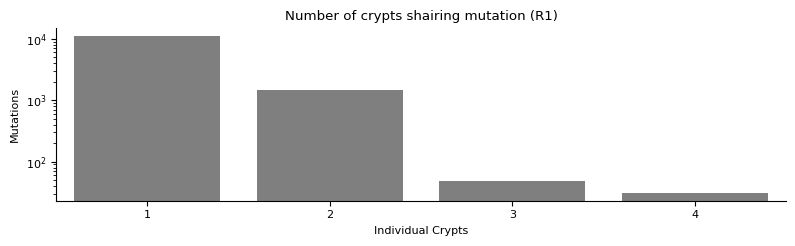

In [174]:
maf = pd.read_csv('../data/single_crypt/FAP03_sgWGS_maf_all_SSNVs_consensus_filtered.csv', sep=',')
maf['Region'] = maf['Tumor_Sample_Label'].apply(lambda x: x.split('_')[1])
maf['Sam_Type'] = maf['Tumor_Sample_Label'].apply(lambda x: x.split('_')[0])

maf = maf[maf['Region']=='R1']
print(maf['Tumor_Sample_Barcode'].unique())

print(f'Total mutations all glands: {maf.shape[0]}')

maf['Mut_ID'] = maf['Chromosome'] + '_' + maf['Start_Position'].astype('str') + '_' + maf['End_Position'].astype('str') + '_' + maf['Reference_Allele'] + '_' + maf['Tumor_Seq_Allele2'] + '_' + maf['Hugo_Symbol']

# Remove all samples that are normal
maf_no_norm = maf[~maf['Sam_Type'].str.contains('N2')]
print("Polyp crypts: ", maf_no_norm['Tumor_Sample_Barcode'].unique().shape[0])

samples = maf_no_norm['Tumor_Sample_Barcode'].unique().shape[0]

# Get matrix of 1 and 0 for each mutation in each sample (1 if mutation is present, 0 if not)
mat = maf_no_norm.pivot_table(index='Mut_ID', columns='Tumor_Sample_Barcode', values='VAF', aggfunc='count', fill_value=0)

# sort by the sum of the row to get the most common mutations at the top
mat = mat.loc[mat.sum(axis=1).sort_values(ascending=False).index]

print(samples)
print(mat.sum(axis=1).shape[0])

x = []
y = []
for i in range(1, samples+1):
    x.append(i)
    print(i, mat.sum(axis=1)[mat.sum(axis=1)==i].shape[0])
    y.append(mat.sum(axis=1)[mat.sum(axis=1)==i].shape[0])
# print(mat.sum(axis=1)[mat.sum(axis=1)==22].shape[0])

# Print private, shared, and ubiquitious (in all samples)
sum_of_samples_per_mut = mat.sum(axis=1)

total_samples = len(maf['Tumor_Sample_Barcode'].unique())

private = sum_of_samples_per_mut[sum_of_samples_per_mut == 1].shape[0]

shared = sum_of_samples_per_mut[sum_of_samples_per_mut > 1].shape[0]

ubiquitous = sum_of_samples_per_mut[sum_of_samples_per_mut == total_samples].shape[0]

shared = shared - ubiquitous # Remove the ubiquitous mutations from the shared count so we don't con't twice

# print(f'Total mutations: {maf.shape[0]}')
print(f'Total unique SNP mutations: {mat.shape[0]}')
print(f'Private: {private} ({private/mat.shape[0]}%)')
print(f'Shared: {shared} ({shared/mat.shape[0]}%)')
print(f'Ubiquitous: {ubiquitous} ({ubiquitous/mat.shape[0]}%)')

fig, ax = plt.subplots(1,1,figsize=(8,2.5))
sns.barplot(x=x, y=y, color='black', alpha=0.5, ax=ax)
sns.despine()
plt.yscale('log')
plt.xlabel('Individual Crypts')
plt.ylabel('Mutations')
plt.title('Number of crypts sharing mutation (R1)')
plt.tight_layout()
plt.savefig('./imgs/mutations_per_crypt_R1.pdf')
plt.show()

['FAP03_N2_R2_G4' 'FAP03_N2_R2_G5' 'FAP03_P2_R2_G3' 'FAP03_P2_R2_G4'
 'FAP03_P2_R2_G5' 'FAP03_P2_R2_G7']
Total mutations all glands: 15541
Polyp crypts:  4
4
9371
1 6656
2 1925
3 449
4 341
Total unique SNP mutations: 9371
Private: 6656 (0.7102763845907587%)
Shared: 2715 (0.2897236154092413%)
Ubiquitous: 0 (0.0%)


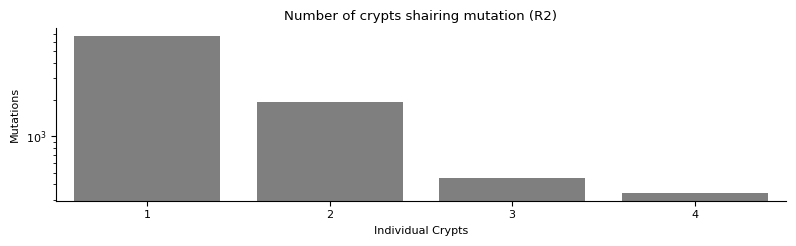

In [175]:
maf = pd.read_csv('../data/single_crypt/FAP03_sgWGS_maf_all_SSNVs_consensus_filtered.csv', sep=',')
maf['Region'] = maf['Tumor_Sample_Label'].apply(lambda x: x.split('_')[1])
maf['Sam_Type'] = maf['Tumor_Sample_Label'].apply(lambda x: x.split('_')[0])

maf = maf[maf['Region']=='R2']
print(maf['Tumor_Sample_Barcode'].unique())

print(f'Total mutations all glands: {maf.shape[0]}')

maf['Mut_ID'] = maf['Chromosome'] + '_' + maf['Start_Position'].astype('str') + '_' + maf['End_Position'].astype('str') + '_' + maf['Reference_Allele'] + '_' + maf['Tumor_Seq_Allele2'] + '_' + maf['Hugo_Symbol']

# Remove all samples that are normal
maf_no_norm = maf[~maf['Sam_Type'].str.contains('N2')]
print("Polyp crypts: ", maf_no_norm['Tumor_Sample_Barcode'].unique().shape[0])

samples = maf_no_norm['Tumor_Sample_Barcode'].unique().shape[0]

# Get matrix of 1 and 0 for each mutation in each sample (1 if mutation is present, 0 if not)
mat = maf_no_norm.pivot_table(index='Mut_ID', columns='Tumor_Sample_Barcode', values='VAF', aggfunc='count', fill_value=0)

# sort by the sum of the row to get the most common mutations at the top
mat = mat.loc[mat.sum(axis=1).sort_values(ascending=False).index]

print(samples)
print(mat.sum(axis=1).shape[0])

x = []
y = []
for i in range(1, samples+1):
    x.append(i)
    print(i, mat.sum(axis=1)[mat.sum(axis=1)==i].shape[0])
    y.append(mat.sum(axis=1)[mat.sum(axis=1)==i].shape[0])
# print(mat.sum(axis=1)[mat.sum(axis=1)==22].shape[0])

# Print private, shared, and ubiquitious (in all samples)
sum_of_samples_per_mut = mat.sum(axis=1)

total_samples = len(maf['Tumor_Sample_Barcode'].unique())

private = sum_of_samples_per_mut[sum_of_samples_per_mut == 1].shape[0]

shared = sum_of_samples_per_mut[sum_of_samples_per_mut > 1].shape[0]

ubiquitous = sum_of_samples_per_mut[sum_of_samples_per_mut == total_samples].shape[0]

shared = shared - ubiquitous # Remove the ubiquitous mutations from the shared count so we don't con't twice

# print(f'Total mutations: {maf.shape[0]}')
print(f'Total unique SNP mutations: {mat.shape[0]}')
print(f'Private: {private} ({private/mat.shape[0]}%)')
print(f'Shared: {shared} ({shared/mat.shape[0]}%)')
print(f'Ubiquitous: {ubiquitous} ({ubiquitous/mat.shape[0]}%)')

fig, ax = plt.subplots(1,1,figsize=(8,2.5))
sns.barplot(x=x, y=y, color='black', alpha=0.5, ax=ax)
sns.despine()
plt.yscale('log')
plt.xlabel('Individual Crypts')
plt.ylabel('Mutations')
plt.title('Number of crypts sharing mutation (R2)')
plt.tight_layout()
plt.savefig('./imgs/mutations_per_crypt_R2.pdf')
plt.show()

['FAP03_N2_R3_G1' 'FAP03_P2_R3_G1' 'FAP03_P2_R3_G2']
Total mutations all glands: 5327
Polyp crypts:  2
2
4723
1 4647
2 76
Total unique SNP mutations: 4723
Private: 4647 (0.9839085327122592%)
Shared: 76 (0.016091467287740843%)
Ubiquitous: 0 (0.0%)


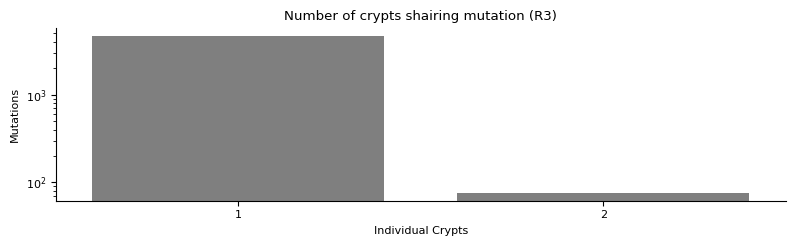

In [176]:
maf = pd.read_csv('../data/single_crypt/FAP03_sgWGS_maf_all_SSNVs_consensus_filtered.csv', sep=',')
maf['Region'] = maf['Tumor_Sample_Label'].apply(lambda x: x.split('_')[1])
maf['Sam_Type'] = maf['Tumor_Sample_Label'].apply(lambda x: x.split('_')[0])

maf = maf[maf['Region']=='R3']
print(maf['Tumor_Sample_Barcode'].unique())

print(f'Total mutations all glands: {maf.shape[0]}')

maf['Mut_ID'] = maf['Chromosome'] + '_' + maf['Start_Position'].astype('str') + '_' + maf['End_Position'].astype('str') + '_' + maf['Reference_Allele'] + '_' + maf['Tumor_Seq_Allele2'] + '_' + maf['Hugo_Symbol']

# Remove all samples that are normal
maf_no_norm = maf[~maf['Sam_Type'].str.contains('N2')]
print("Polyp crypts: ", maf_no_norm['Tumor_Sample_Barcode'].unique().shape[0])

samples = maf_no_norm['Tumor_Sample_Barcode'].unique().shape[0]

# Get matrix of 1 and 0 for each mutation in each sample (1 if mutation is present, 0 if not)
mat = maf_no_norm.pivot_table(index='Mut_ID', columns='Tumor_Sample_Barcode', values='VAF', aggfunc='count', fill_value=0)

# sort by the sum of the row to get the most common mutations at the top
mat = mat.loc[mat.sum(axis=1).sort_values(ascending=False).index]

print(samples)
print(mat.sum(axis=1).shape[0])

x = []
y = []
for i in range(1, samples+1):
    x.append(i)
    print(i, mat.sum(axis=1)[mat.sum(axis=1)==i].shape[0])
    y.append(mat.sum(axis=1)[mat.sum(axis=1)==i].shape[0])
# print(mat.sum(axis=1)[mat.sum(axis=1)==22].shape[0])

# Print private, shared, and ubiquitious (in all samples)
sum_of_samples_per_mut = mat.sum(axis=1)

total_samples = len(maf['Tumor_Sample_Barcode'].unique())

private = sum_of_samples_per_mut[sum_of_samples_per_mut == 1].shape[0]

shared = sum_of_samples_per_mut[sum_of_samples_per_mut > 1].shape[0]

ubiquitous = sum_of_samples_per_mut[sum_of_samples_per_mut == total_samples].shape[0]

shared = shared - ubiquitous # Remove the ubiquitous mutations from the shared count so we don't con't twice

# print(f'Total mutations: {maf.shape[0]}')
print(f'Total unique SNP mutations: {mat.shape[0]}')
print(f'Private: {private} ({private/mat.shape[0]}%)')
print(f'Shared: {shared} ({shared/mat.shape[0]}%)')
print(f'Ubiquitous: {ubiquitous} ({ubiquitous/mat.shape[0]}%)')

fig, ax = plt.subplots(1,1,figsize=(8,2.5))
sns.barplot(x=x, y=y, color='black', alpha=0.5, ax=ax)
sns.despine()
plt.yscale('log')
plt.xlabel('Individual Crypts')
plt.ylabel('Mutations')
plt.title('Number of crypts sharing mutation (R3)')
plt.tight_layout()
plt.savefig('./imgs/mutations_per_crypt_R3.pdf')
plt.show()

['FAP03_P2_R5_G12' 'FAP03_P2_R5_G5' 'FAP03_P2_R5_G9']
Total mutations all glands: 11763
Polyp crypts:  3
3
9009
1 6291
2 2682
3 36
Total unique SNP mutations: 9009
Private: 6291 (0.6983016983016983%)
Shared: 2682 (0.2977022977022977%)
Ubiquitous: 36 (0.003996003996003996%)


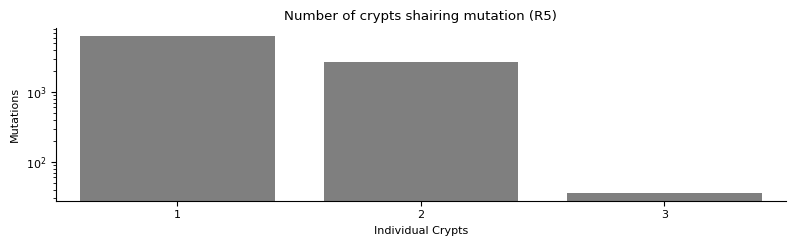

In [177]:
maf = pd.read_csv('../data/single_crypt/FAP03_sgWGS_maf_all_SSNVs_consensus_filtered.csv', sep=',')
maf['Region'] = maf['Tumor_Sample_Label'].apply(lambda x: x.split('_')[1])
maf['Sam_Type'] = maf['Tumor_Sample_Label'].apply(lambda x: x.split('_')[0])

maf = maf[maf['Region']=='R5']
print(maf['Tumor_Sample_Barcode'].unique())

print(f'Total mutations all glands: {maf.shape[0]}')

maf['Mut_ID'] = maf['Chromosome'] + '_' + maf['Start_Position'].astype('str') + '_' + maf['End_Position'].astype('str') + '_' + maf['Reference_Allele'] + '_' + maf['Tumor_Seq_Allele2'] + '_' + maf['Hugo_Symbol']

# Remove all samples that are normal
maf_no_norm = maf[~maf['Sam_Type'].str.contains('N2')]
print("Polyp crypts: ", maf_no_norm['Tumor_Sample_Barcode'].unique().shape[0])

samples = maf_no_norm['Tumor_Sample_Barcode'].unique().shape[0]

# Get matrix of 1 and 0 for each mutation in each sample (1 if mutation is present, 0 if not)
mat = maf_no_norm.pivot_table(index='Mut_ID', columns='Tumor_Sample_Barcode', values='VAF', aggfunc='count', fill_value=0)

# sort by the sum of the row to get the most common mutations at the top
mat = mat.loc[mat.sum(axis=1).sort_values(ascending=False).index]

print(samples)
print(mat.sum(axis=1).shape[0])

x = []
y = []
for i in range(1, samples+1):
    x.append(i)
    print(i, mat.sum(axis=1)[mat.sum(axis=1)==i].shape[0])
    y.append(mat.sum(axis=1)[mat.sum(axis=1)==i].shape[0])
# print(mat.sum(axis=1)[mat.sum(axis=1)==22].shape[0])

# Print private, shared, and ubiquitious (in all samples)
sum_of_samples_per_mut = mat.sum(axis=1)

total_samples = len(maf['Tumor_Sample_Barcode'].unique())

private = sum_of_samples_per_mut[sum_of_samples_per_mut == 1].shape[0]

shared = sum_of_samples_per_mut[sum_of_samples_per_mut > 1].shape[0]

ubiquitous = sum_of_samples_per_mut[sum_of_samples_per_mut == total_samples].shape[0]

shared = shared - ubiquitous # Remove the ubiquitous mutations from the shared count so we don't con't twice

# print(f'Total mutations: {maf.shape[0]}')
print(f'Total unique SNP mutations: {mat.shape[0]}')
print(f'Private: {private} ({private/mat.shape[0]}%)')
print(f'Shared: {shared} ({shared/mat.shape[0]}%)')
print(f'Ubiquitous: {ubiquitous} ({ubiquitous/mat.shape[0]}%)')

fig, ax = plt.subplots(1,1,figsize=(8,2.5))
sns.barplot(x=x, y=y, color='black', alpha=0.5, ax=ax)
sns.despine()
plt.yscale('log')
plt.xlabel('Individual Crypts')
plt.ylabel('Mutations')
plt.title('Number of crypts sharing mutation (R5)')
plt.tight_layout()
plt.savefig('./imgs/mutations_per_crypt_R5.pdf')
plt.show()

['FAP03_P2_R6_G1' 'FAP03_P2_R6_G13' 'FAP03_P2_R6_G3' 'FAP03_P2_R6_G6'
 'FAP03_P2_R6_G7' 'FAP03_P2_R6_G8']
Total mutations all glands: 16623
Polyp crypts:  6
6
13984
1 12261
2 1008
3 588
4 73
5 34
6 20
Total unique SNP mutations: 13984
Private: 12261 (0.8767877574370709%)
Shared: 1703 (0.12178203661327232%)
Ubiquitous: 20 (0.0014302059496567505%)


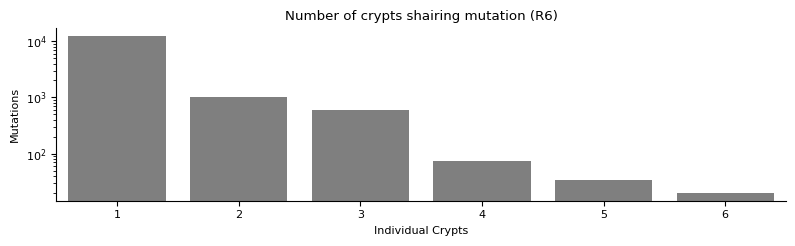

In [178]:
maf = pd.read_csv('../data/single_crypt/FAP03_sgWGS_maf_all_SSNVs_consensus_filtered.csv', sep=',')
maf['Region'] = maf['Tumor_Sample_Label'].apply(lambda x: x.split('_')[1])
maf['Sam_Type'] = maf['Tumor_Sample_Label'].apply(lambda x: x.split('_')[0])

maf = maf[maf['Region']=='R6']
print(maf['Tumor_Sample_Barcode'].unique())

print(f'Total mutations all glands: {maf.shape[0]}')

maf['Mut_ID'] = maf['Chromosome'] + '_' + maf['Start_Position'].astype('str') + '_' + maf['End_Position'].astype('str') + '_' + maf['Reference_Allele'] + '_' + maf['Tumor_Seq_Allele2'] + '_' + maf['Hugo_Symbol']

# Remove all samples that are normal
maf_no_norm = maf[~maf['Sam_Type'].str.contains('N2')]
print("Polyp crypts: ", maf_no_norm['Tumor_Sample_Barcode'].unique().shape[0])

samples = maf_no_norm['Tumor_Sample_Barcode'].unique().shape[0]

# Get matrix of 1 and 0 for each mutation in each sample (1 if mutation is present, 0 if not)
mat = maf_no_norm.pivot_table(index='Mut_ID', columns='Tumor_Sample_Barcode', values='VAF', aggfunc='count', fill_value=0)

# sort by the sum of the row to get the most common mutations at the top
mat = mat.loc[mat.sum(axis=1).sort_values(ascending=False).index]

print(samples)
print(mat.sum(axis=1).shape[0])

x = []
y = []
for i in range(1, samples+1):
    x.append(i)
    print(i, mat.sum(axis=1)[mat.sum(axis=1)==i].shape[0])
    y.append(mat.sum(axis=1)[mat.sum(axis=1)==i].shape[0])
# print(mat.sum(axis=1)[mat.sum(axis=1)==22].shape[0])

# Print private, shared, and ubiquitious (in all samples)
sum_of_samples_per_mut = mat.sum(axis=1)

total_samples = len(maf['Tumor_Sample_Barcode'].unique())

private = sum_of_samples_per_mut[sum_of_samples_per_mut == 1].shape[0]

shared = sum_of_samples_per_mut[sum_of_samples_per_mut > 1].shape[0]

ubiquitous = sum_of_samples_per_mut[sum_of_samples_per_mut == total_samples].shape[0]

shared = shared - ubiquitous # Remove the ubiquitous mutations from the shared count so we don't con't twice

# print(f'Total mutations: {maf.shape[0]}')
print(f'Total unique SNP mutations: {mat.shape[0]}')
print(f'Private: {private} ({private/mat.shape[0]}%)')
print(f'Shared: {shared} ({shared/mat.shape[0]}%)')
print(f'Ubiquitous: {ubiquitous} ({ubiquitous/mat.shape[0]}%)')

fig, ax = plt.subplots(1,1,figsize=(8,2.5))
sns.barplot(x=x, y=y, color='black', alpha=0.5, ax=ax)
sns.despine()
plt.yscale('log')
plt.xlabel('Individual Crypts')
plt.ylabel('Mutations')
plt.title('Number of crypts sharing mutation (R6)')
plt.tight_layout()
plt.savefig('/Users/ryanschenck/Dropbox/Projects/FAP_Project/data/single_crypt/imgs/mutations_per_crypt_R6.pdf')
plt.show()

In [179]:
from pycirclize import Circos

[[   0.  662.  780.   80.  706.  691.  548.  294.  127.  100.   96.   81.
    85.  110.   77.   95.   55.   62.  180.  120.  203.  768.  129.  109.]
 [ 662.    0.   79.   79.  105.   58.   58.   92.   66.   56.   70.   75.
    68.   64.   68.   67.   29.   37.   26.   60.   62.   75.   59.   75.]
 [ 780.   79.    0.   95. 1112. 1064.  855.  442.  141.  110.   92.   93.
    78.   92.   79.   85.   59.   49.  242.  132.  264. 1179.  161.  144.]
 [  80.   79.   95.    0.   72.   92.   92.   88.   80.   67.   85.   96.
    68.   81.   83.   96.   44.   44.   34.   93.   75.   95.   65.   99.]
 [ 706.  105. 1112.   72.    0.  945.  774.  483.  120.   76.   72.   57.
    54.   53.   59.   61.   31.   34.  226.   93.  223. 1120.  132.  117.]
 [ 691.   58. 1064.   92.  945.    0. 2305.  410.  127.  112.   80.  104.
    92.  102.   72.  106.   54.   62.  243.  140.  251. 1018.  155.  133.]
 [ 548.   58.  855.   92.  774. 2305.    0.  401.  116.   94.   72.  103.
    82.   91.   76.  106.   56. 

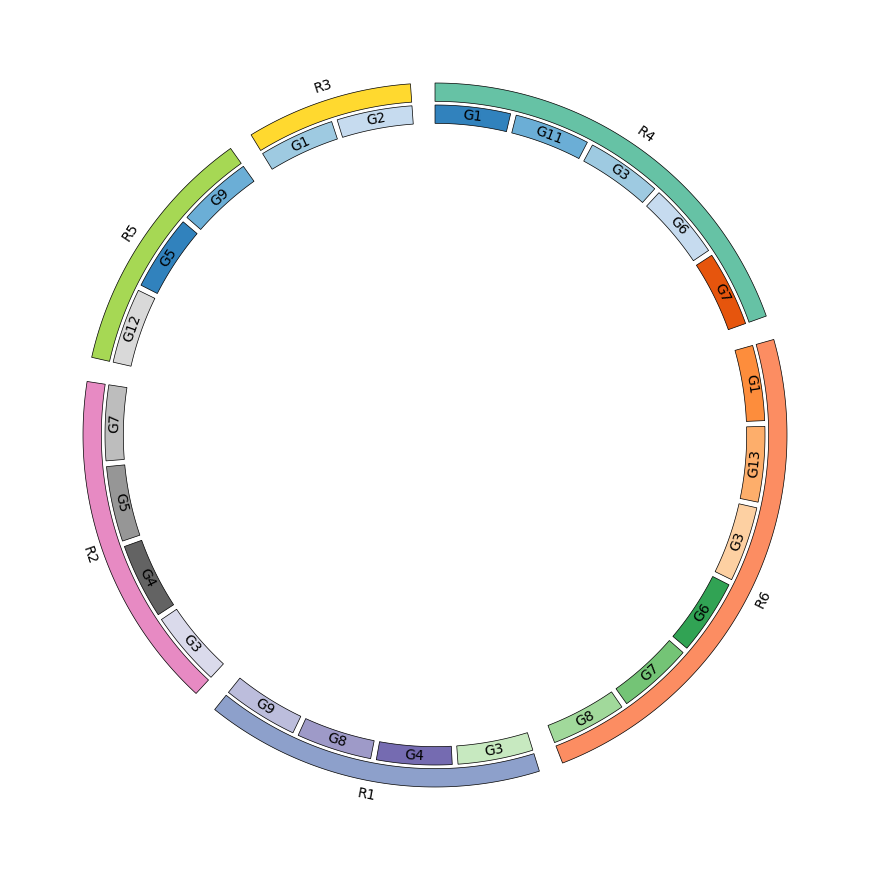

In [257]:
from pycirclize import Circos
from pycirclize.utils import calc_group_spaces, ColorCycler
from matplotlib import pyplot as plt

maf = pd.read_csv('../data/single_crypt/FAP03_sgWGS_maf_all_SSNVs_consensus_filtered.csv', sep=',')
maf['Region'] = maf['Tumor_Sample_Label'].apply(lambda x: x.split('_')[1])
maf['Sam_Type'] = maf['Tumor_Sample_Label'].apply(lambda x: x.split('_')[0])

maf['Mut_ID'] = maf['Chromosome'] + '_' + maf['Start_Position'].astype('str') + '_' + maf['End_Position'].astype('str') + '_' + maf['Reference_Allele'] + '_' + maf['Tumor_Seq_Allele2'] + '_' + maf['Hugo_Symbol']

# Remove all samples that are normal
maf_no_norm = maf[~maf['Sam_Type'].str.contains('N2')]

# Pivot dataframe and determine if a mutation is shared or private
# Create aggregated MutID
pivoted = maf_no_norm.pivot_table(index='Mut_ID', columns='Tumor_Sample_Label', values='VAF', aggfunc='count', fill_value=0)
sharing_dict = pivoted.sum(axis=1).to_dict()
# Determine if a mutation is shared or private
maf_no_norm['Shared'] = maf_no_norm['Mut_ID'].apply(lambda x: 1 if sharing_dict[x] > 1 else 0)

crypts = maf_no_norm['Tumor_Sample_Barcode'].unique()
region_counts = maf_no_norm['Region'].value_counts()

# Get shared count dictionary per sample
shared_count = {}
for sam in maf_no_norm['Tumor_Sample_Barcode'].unique():
    shared_count[sam] = maf_no_norm[maf_no_norm['Tumor_Sample_Barcode']==sam]['Shared'].sum()

# Shared matrix
x = maf_no_norm['Tumor_Sample_Barcode'].unique()
y = maf_no_norm['Tumor_Sample_Barcode'].unique()
shared_mat = np.zeros((len(x), len(y)))

for i, xi in enumerate(x):
    for j, yj in enumerate(y):
        if i == j:
            continue
        pairs = maf_no_norm[maf_no_norm['Tumor_Sample_Barcode'].isin([xi, yj])]
        pt = pairs.pivot_table(index='Mut_ID', columns='Tumor_Sample_Barcode', values='VAF', aggfunc='count', fill_value=0)
        # Sum rows
        pt['Shared'] = pt.sum(axis=1)
        shared_mat[i,j] = pt['Shared'][(pt['Shared'] > 1)].shape[0]
        
print(shared_mat)

# Create a dictionary of the number of crypts in each region
region_crypts = {}
group_lists = []
for reg in region_counts.index:
    region_crypts[reg] = maf_no_norm[maf_no_norm['Region']==reg]['Tumor_Sample_Barcode'].unique().shape[0]
    group_lists.append(maf_no_norm[maf_no_norm['Region']==reg]['Tumor_Sample_Barcode'].unique())

sectors = {name: region_crypts[name] for name in region_crypts.keys()}
group1, group2, group3, group4, group5, group6 = group_lists

# Flatten the list of lists
sectors = [item for sublist in group_lists for item in sublist]
sectors = {name: 20 for name in sectors}

print(group_lists)
print([len(g) for g in group_lists])
spaces_values = [len(g) for g in group_lists]
# Calculate appropriate group between/within spaces
# In this example, 10 sectors are displayed as groups dividied into [4, 3, 3]
spaces = calc_group_spaces(spaces_values, space_bw_group=4, space_in_group=1)
circos = Circos(sectors, space=spaces)

# 6 colors of different shades
ColorCycler.set_cmap("tab20c")
for sector in circos.sectors:
    track = sector.add_track(r_lim=(85, 90))
    track.axis(fc=ColorCycler())
    name = sector.name.split('_')[3]
    track.text(name)
    i+=1

# # Plot group sectors range
ColorCycler.set_cmap("Set2")
# Get colors that are in the shade of the group color

for idx, group in enumerate(group_lists, 1):
    print(group)
    group_deg_lim = circos.get_group_sectors_deg_lim(group)
    circos.rect(r_lim=(91, 96), deg_lim=group_deg_lim, fc=ColorCycler(), ec="black", lw=0.5)
    group_center_deg = sum(group_deg_lim) / 2
    # Get region number
    region = group[0].split('_')[2]
    circos.text(f"{region}", r=98, deg=group_center_deg, adjust_rotation=True)

fig = circos.plotfig()

plt.show()

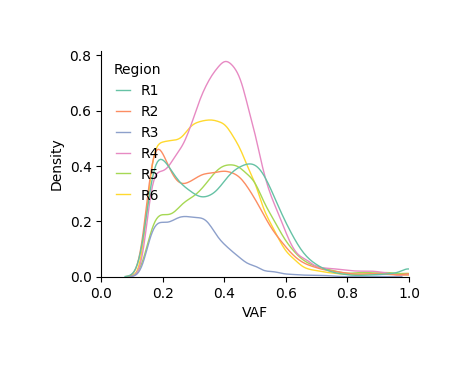

In [277]:
fig, ax = plt.subplots(1,1,figsize=(4,3))

sns.kdeplot(data=maf_no_norm, x='VAF', ax=ax, hue='Region', alpha=1, common_norm=True, lw=1, fill=False, palette='Set2')

# Legend outside plot
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.xlabel('VAF')
plt.ylabel('Density')
sns.despine()
plt.xlim(0,1)
plt.tight_layout()
plt.savefig('/Users/ryanschenck/Dropbox/Projects/FAP_Project/data/single_crypt/imgs/vaf_distribution_all_regions.pdf')
plt.show()

## Phylogeny

In [57]:
class PAUPRunAllSams:

    def __init__(self, ptmuts, wxs='WGS', pt="ALL", output="./processed_data/", nexusTemplate="/Users/ryanschenck/Dropbox/Projects/FAP_Project/phylogeny/output/phylogeny_PAUP/PAUP_Run_Options.nex", paupExe="/Users/ryanschenck/Dropbox/Bioinformatics_Tools/paup4a168_osx", withBlood=True, prune=False):
        ## Variables
        self.pt = pt
        self.wxs = wxs
        self.path = output + "/%s_%s_PAUPrun/" %(self.pt, wxs)
        self.nexfile = self.path + "%s.%s.nex" %(self.pt, wxs)
        self.nexusRunOpts = nexusTemplate
        self.paupExe = paupExe

        ## Create directory for NEXUS run
        if os.path.exists(self.path )==False:
            os.mkdir(self.path)

        ## Get mutation information for patient to keep in class
        self.ptmuts = ptmuts

        ## Setup Matrix to house mutation presence
        self.withBlood = withBlood

        ## Get mutation matrix
        # mat is the matrix, snaSet is the mutation identifier, and sampleIDSet is the sample IDs
        self.mat, self.snaSet, self.sampleIDSet = self._assignMutsToMat()

        if prune:
            self._pruneMatrix()

        ## Get NEXUS File
        self.fixedSampleIDs = None # Sample IDs for those whose characters don't work with PAUP
        self.sampleDict = None
        self._writeNexusFile()
    
    def _pruneMatrix(self):
        self.mat = self.mat[np.where(self.mat.sum(axis=1)>1)[0]]
        self.snaSet = np.asarray(self.snaSet)[np.where(self.mat.sum(axis=1)>1)[0]]
        # simplesampleIDSet = np.asarray(paupExe.sampleIDSet)[np.where(paupExe.mat.sum(axis=1)>1)[0]]

    def _writeNexusFile(self):
        template = self._loadNexusOpts()

        self.fixedSampleIDs = [idval.replace('_','').replace(' ','').replace('-','') for idval in self.sampleIDSet]
        self.sampleDict = dict(zip( self.fixedSampleIDs , self.sampleIDSet ))

        template = template.replace('?MAT?', self._prettyPrintMat())
        template = template.replace('?NTAX?', str(len(self.fixedSampleIDs)))
        template = template.replace('?NCHAR?', str(self.mat.shape[0]))
        template = template.replace('?PATIENT?', self.pt)
        template = template.replace('?WXS?', self.wxs)

        with open(self.nexfile, "w") as outputFile:
            outputFile.write(template)

        with open(self.nexfile.replace(".nex",".dummy.nex"), "w") as outputFile:
            outputFile.write( template.replace("begin paup;", "begin __paup;") )

    def _loadNexusOpts(self):
        '''
        To replace:
        ?MAT? ?NTAX? ?NCHAR? ?PATIENT? ?WXS?
        '''
        with open(self.nexusRunOpts, "r") as nexusFile:
            opts = ''.join(nexusFile.readlines())
        return(opts)

    def _assignMutsToMat(self):
        '''
        Assign SNA to PAUP ready matrix
        '''
        iterMuts = self.ptmuts[['Mut_ID', 'Tumor_Sample_Barcode']]

        pd.options.mode.chained_assignment = None  # default='warn'

        iterMuts['Presence'] = 1 # Assign presence

        pd.options.mode.chained_assignment = 'warn'  # default='warn'

        mat = iterMuts.pivot(columns="Tumor_Sample_Barcode", values="Presence", index="Mut_ID")

        sampleIDSet = mat.columns.tolist() # Pull info

        snaSet = mat.index.tolist() # Pull info

        mat = mat.to_numpy() # Get matrix
        np.nan_to_num(mat, copy=False, nan=0)
        mat = mat.astype("int")

        if self.withBlood:
            sampleIDSet.insert(0 ,"Blood")
            bloodOutgroup = np.zeros((mat.shape[0] ,1), dtype="int")
            mat = np.concatenate((bloodOutgroup, mat), axis=1)

        return( mat, snaSet, sampleIDSet)

    def _prettyPrintMat(self):
        '''
        Create a matrix per sample that is 1000 characters wide

        '''
        n=1000
        ret = []
        for i in range(0, self.mat.shape[1]):
            ret.append( self.fixedSampleIDs[ i ] )
            sampleMutStrSet = ''.join([str(v) for v in self.mat[:,i]])
            sampleMutStrSetNotWide = '\n'.join([sampleMutStrSet[i:i+n] for i in range(0, len(sampleMutStrSet), n)])
            ret.append(sampleMutStrSetNotWide)
        return( '\n'.join(ret) )

    def executePAUP(self):
        cmd = [self.paupExe, self.nexfile, "--noninteractive"]
        p = Popen(cmd, stdin=PIPE, stdout=PIPE, stderr=PIPE)
        output, err = p.communicate(b"input data that is passed to subprocess' stdin")
        rc = p.returncode
        print("Exit code %s: %s"%(self.pt , rc))

In [9]:
muts = maf[['Tumor_Sample_Barcode','Mut_ID']].reset_index(drop=True)

In [10]:
paupExe_single_crypts = PAUPRunAllSams(muts, 'WGS', pt='single_crypts', output='/Users/ryanschenck/Dropbox/Projects/FAP_Project/data/single_crypt/phylogeny/output/phylogeny_PAUP', prune=False)

In [55]:
import joblib

# Output all samples paupruns into a joblib
joblib.dump({'single_crypts':paupExe_single_crypts}, "/Users/ryanschenck/Dropbox/Projects/FAP_Project/data/single_crypt/phylogeny/output/phylogeny_PAUP/PAUPRunAllSams_singlecrypts.joblib")

In [12]:
from subprocess import Popen, PIPE
# Only do if you need to rerun this!!!!!!!!!!
# paupExe_single_crypts.executePAUP()

In [65]:
import joblib

# Load joblib
paupExe_single_crypts = joblib.load("/Users/ryanschenck/Dropbox/Projects/FAP_Project/data/single_crypt/phylogeny/output/phylogeny_PAUP/PAUPRunAllSams_singlecrypts.joblib")

sgWGS = paupExe_single_crypts['single_crypts']

print('Mutations in SSNV set:',len(sgWGS.snaSet))

Mutations in SSNV set: 59242


59242

### Analyze phylogenetic output

In [14]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from Bio import Phylo
from Bio.Phylo.Consensus import *
import subprocess
import glob

from statannotations.Annotator import Annotator

font = {'size'   : 8}
plt.rc('font', **font)
plt.rcParams['pdf.fonttype'] = 42

def calculate_bifurcation_ratio(tree):
    # List to store the number of child nodes for each internal node
    child_counts = []
    
    # Iterate over all internal nodes (clades) in the tree
    for clade in tree.find_clades(terminal=False):
        child_counts.append(len(clade.clades))
    
    # Calculate average bifurcation
    avg_bifurcation = sum(child_counts) / len(child_counts)
    
    return avg_bifurcation

def compute_gamma_stat_via_r(tree_path, gamma_script='/Users/ryanschenck/Dropbox/Projects/FAP_Project/notebooks/utils/compute_gamma_stat.R'):
    # Call the R script using subprocess
    result = subprocess.run([gamma_script, tree_path], capture_output=True, text=True)
    
    # Check if the R script executed without errors
    if result.returncode != 0:
        print("Error executing R script:")
        print(result.stderr)
        return None
    else:
        # Extract the gamma statistic from the output
        output = [float(res.split('[1] ')[1]) for res in result.stdout.strip().split('\n')]
        output = dict(zip(['gamma', 'pvalue'], output))
        # try:
        #     g_value = float(output)
        # except ValueError:
        #     print(f"Unexpected output from R script:\n{output}")
        #     return None

    return output


##### Gather outputs from other cohorts

In [15]:
res_paths = glob.glob("/Users/ryanschenck/Dropbox/Projects/FAP_Project/phylogeny/output/phylogeny_PAUP/*")

res = []
for path in res_paths:
    try:
        if path.endswith('.nex')==False:
            print(path)
            
            contree = list(Phylo.parse(f"{path}/fileref.contree50.tre", "newick"))
            best = list(Phylo.parse(f"{path}/fileref.bestTrees.tre", "newick"))

            gammaStat = compute_gamma_stat_via_r(f"{path}/fileref.bestTrees.tre")

            gammaStat['patient'] = path.split('/')[-1].split('_')[0]
            gammaStat['WXS'] = path.split('/')[-1].split('_')[1]
            gammaStat['Rb'] = calculate_bifurcation_ratio(contree[0])
            gammaStat['Cohort'] = "HTANFAP"

            log = f"{path}/paup.log"
            try:
                with open(log, 'r') as infile:
                    lines = infile.readlines()
                
                hi_lines = []
                for l in lines:
                    if "HI excluding uninformative characters =" in l:
                        l = l.replace('\n','')
                        l = l.split(' = ')
                        hi_lines.append(l)
                
                if hi_lines != []:
                    if len(hi_lines) > 1:
                        l = hi_lines[1][1]
                    else:
                        l = hi_lines[0][1]
                        
                    l = float(l)
                    # print(l)
                    # df = {'Patient':path.split('/')[-1].split('_')[0], 'WXS':'WES', 'HI': float(l), 'Cohort':'Sporadic'}
                    # ret.append( df )
            except FileNotFoundError as e: # Skip A014 & A015 WES as these are only WGS
                l=float('nan')
                pass
            
            gammaStat['HI'] = l
            
            res.append(gammaStat)
    except NotADirectoryError:
        pass

/Users/ryanschenck/Dropbox/Projects/FAP_Project/phylogeny/output/phylogeny_PAUP/EP_WES_PAUPrun
/Users/ryanschenck/Dropbox/Projects/FAP_Project/phylogeny/output/phylogeny_PAUP/A014_WGS_PAUPrun
/Users/ryanschenck/Dropbox/Projects/FAP_Project/phylogeny/output/phylogeny_PAUP/JP_WGS_PAUPrun
/Users/ryanschenck/Dropbox/Projects/FAP_Project/phylogeny/output/phylogeny_PAUP/A001_WGS_PAUPrun
/Users/ryanschenck/Dropbox/Projects/FAP_Project/phylogeny/output/phylogeny_PAUP/PAUPRunAllSams_WES.joblib
/Users/ryanschenck/Dropbox/Projects/FAP_Project/phylogeny/output/phylogeny_PAUP/A002_WGS_PAUPrun
/Users/ryanschenck/Dropbox/Projects/FAP_Project/phylogeny/output/phylogeny_PAUP/PAUPRunAllSams_WGS.joblib
/Users/ryanschenck/Dropbox/Projects/FAP_Project/phylogeny/output/phylogeny_PAUP/A001_WES_PAUPrun
/Users/ryanschenck/Dropbox/Projects/FAP_Project/phylogeny/output/phylogeny_PAUP/A015_WGS_PAUPrun
/Users/ryanschenck/Dropbox/Projects/FAP_Project/phylogeny/output/phylogeny_PAUP/JP_WES_PAUPrun
/Users/ryanschenck

In [16]:
res_paths = glob.glob("/Users/ryanschenck/Dropbox/Projects/FAP_Project/phylogeny/output/sarek/*")

for path in res_paths:
    if path.endswith('.nex')==False:
        print(path)
        
        contree = list(Phylo.parse(f"{path}/fileref.contree50.tre", "newick"))
        best = list(Phylo.parse(f"{path}/fileref.bestTrees.tre", "newick"))
        
        # Calculate stats and visualize
        # Phylo.draw(best[0])

        gammaStat = compute_gamma_stat_via_r(f"{path}/fileref.bestTrees.tre")

        gammaStat['patient'] = path.split('/')[-1].split('_')[0]
        gammaStat['WXS'] = 'WES'
        gammaStat['Rb'] = calculate_bifurcation_ratio(contree[0])
        gammaStat['Cohort'] = "FAP"

        log = f"{path}/paup.log"
        try:
            with open(log, 'r') as infile:
                lines = infile.readlines()
            
            hi_lines = []
            for l in lines:
                if "HI excluding uninformative characters =" in l:
                    l = l.replace('\n','')
                    l = l.split(' = ')
                    hi_lines.append(l)
            
            if hi_lines != []:
                if len(hi_lines) > 1:
                    l = hi_lines[1][1]
                else:
                    l = hi_lines[0][1]
                    
                l = float(l)
                # print(l)
                # df = {'Patient':path.split('/')[-1].split('_')[0], 'WXS':'WES', 'HI': float(l), 'Cohort':'Sporadic'}
                # ret.append( df )
        except FileNotFoundError as e: # Skip A014 & A015 WES as these are only WGS
            l=float('nan')
            pass
        
        gammaStat['HI'] = l

        res.append(gammaStat)

/Users/ryanschenck/Dropbox/Projects/FAP_Project/phylogeny/output/sarek/FAP5_WGS_PAUPrun
/Users/ryanschenck/Dropbox/Projects/FAP_Project/phylogeny/output/sarek/CRC2_WGS_PAUPrun
/Users/ryanschenck/Dropbox/Projects/FAP_Project/phylogeny/output/sarek/FAP3_WGS_PAUPrun
/Users/ryanschenck/Dropbox/Projects/FAP_Project/phylogeny/output/sarek/CRC1_WGS_PAUPrun
/Users/ryanschenck/Dropbox/Projects/FAP_Project/phylogeny/output/sarek/FAP1_WGS_PAUPrun
/Users/ryanschenck/Dropbox/Projects/FAP_Project/phylogeny/output/sarek/FAP4_WGS_PAUPrun
/Users/ryanschenck/Dropbox/Projects/FAP_Project/phylogeny/output/sarek/MAP1_WGS_PAUPrun
/Users/ryanschenck/Dropbox/Projects/FAP_Project/phylogeny/output/sarek/FAP2_WGS_PAUPrun


In [17]:
res_paths = glob.glob("/Users/ryanschenck/Dropbox/Projects/FAP_Project/phylogeny/output/cross/*")

for path in res_paths:
    if path.endswith('.nex')==False:
        print(path)
        
        try:
            contree = list(Phylo.parse(f"{path}/fileref.contree50.tre", "newick"))
            best = list(Phylo.parse(f"{path}/fileref.bestTrees.tre", "newick"))
        except FileNotFoundError:
            print("File not found")
            continue
        
        # Calculate stats and visualize
        # Phylo.draw(best[0])

        gammaStat = compute_gamma_stat_via_r(f"{path}/fileref.bestTrees.tre")

        gammaStat['patient'] = path.split('/')[-1].split('_')[0]
        gammaStat['WXS'] = 'WES'
        gammaStat['Rb'] = calculate_bifurcation_ratio(contree[0])
        gammaStat['Cohort'] = "Sporadic"

        log = f"{path}/paup.log"
        try:
            with open(log, 'r') as infile:
                lines = infile.readlines()
            
            hi_lines = []
            for l in lines:
                if "HI excluding uninformative characters =" in l:
                    l = l.replace('\n','')
                    l = l.split(' = ')
                    hi_lines.append(l)
            
            if hi_lines != []:
                if len(hi_lines) > 1:
                    l = hi_lines[1][1]
                else:
                    l = hi_lines[0][1]
                    
                l = float(l)
                # print(l)
                # df = {'Patient':path.split('/')[-1].split('_')[0], 'WXS':'WES', 'HI': float(l), 'Cohort':'Sporadic'}
                # ret.append( df )
        except FileNotFoundError as e: # Skip A014 & A015 WES as these are only WGS
            l=float('nan')
            pass
        
        gammaStat['HI'] = l

        res.append(gammaStat)


# ret = []
# for path in res_paths:
#     log = f"{path}/paup.log"
#     try:
#         with open(log, 'r') as infile:
#             lines = infile.readlines()
        
#         hi_lines = []
#         for l in lines:
#             if "HI excluding uninformative characters =" in l:
#                 l = l.replace('\n','')
#                 l = l.split(' = ')
#                 hi_lines.append(l)
#         print(hi_lines)
#         if len(hi_lines) > 1:
#             l = hi_lines[1][1]
#         else:
#             l = hi_lines[0][1]
#         # print(l)
#         df = {'Patient':path.split('/')[-1].split('_')[0], 'WXS':'WES', 'HI': float(l), 'Cohort':'Sporadic'}
#         ret.append( df )
#     except FileNotFoundError as e: # Skip A014 & A015 WES as these are only WGS
#         pass

/Users/ryanschenck/Dropbox/Projects/FAP_Project/phylogeny/output/cross/A01_WGS_PAUPrun
/Users/ryanschenck/Dropbox/Projects/FAP_Project/phylogeny/output/cross/A08_WGS_PAUPrun
File not found
/Users/ryanschenck/Dropbox/Projects/FAP_Project/phylogeny/output/cross/A07_WGS_PAUPrun
File not found
/Users/ryanschenck/Dropbox/Projects/FAP_Project/phylogeny/output/cross/A02_WGS_PAUPrun
/Users/ryanschenck/Dropbox/Projects/FAP_Project/phylogeny/output/cross/A05_WGS_PAUPrun
/Users/ryanschenck/Dropbox/Projects/FAP_Project/phylogeny/output/cross/C07_WGS_PAUPrun
/Users/ryanschenck/Dropbox/Projects/FAP_Project/phylogeny/output/cross/A09_WGS_PAUPrun
File not found
/Users/ryanschenck/Dropbox/Projects/FAP_Project/phylogeny/output/cross/A03_WGS_PAUPrun
/Users/ryanschenck/Dropbox/Projects/FAP_Project/phylogeny/output/cross/C08_WGS_PAUPrun
/Users/ryanschenck/Dropbox/Projects/FAP_Project/phylogeny/output/cross/A06_WGS_PAUPrun
File not found


In [18]:
res_paths = glob.glob("/Users/ryanschenck/Dropbox/Projects/FAP_Project/data/single_crypt/phylogeny/output/phylogeny_PAUP/*")

for path in res_paths:
    if os.path.isdir(path):
        if path.endswith('.nex')==False:
            print(path)
            
            contree = list(Phylo.parse(f"{path}/fileref.contree50.tre", "newick"))
            best = list(Phylo.parse(f"{path}/fileref.bestTrees.tre", "newick"))
            
            # Calculate stats and visualize
            # Phylo.draw(best[0])

            gammaStat = compute_gamma_stat_via_r(f"{path}/fileref.bestTrees.tre")

            gammaStat['patient'] = path.split('/')[-1].split('_')[0]
            gammaStat['WXS'] = 'WGS'
            gammaStat['Rb'] = calculate_bifurcation_ratio(contree[0])
            gammaStat['Cohort'] = "FAP_SingleCrypts"

            log = f"{path}/paup.log"
            try:
                with open(log, 'r') as infile:
                    lines = infile.readlines()
                
                hi_lines = []
                for l in lines:
                    if "HI excluding uninformative characters =" in l:
                        l = l.replace('\n','')
                        l = l.split(' = ')
                        hi_lines.append(l)
                
                if hi_lines != []:
                    if len(hi_lines) > 1:
                        l = hi_lines[1][1]
                    else:
                        l = hi_lines[0][1]
                        
                    l = float(l)
                    # print(l)
                    # df = {'Patient':path.split('/')[-1].split('_')[0], 'WXS':'WES', 'HI': float(l), 'Cohort':'Sporadic'}
                    # ret.append( df )
            except FileNotFoundError as e: # Skip A014 & A015 WES as these are only WGS
                l=float('nan')
                pass
            
            gammaStat['HI'] = l

            res.append(gammaStat)

/Users/ryanschenck/Dropbox/Projects/FAP_Project/data/single_crypt/phylogeny/output/phylogeny_PAUP/single_crypts_WGS_PAUPrun


In [19]:
tree_stats = pd.DataFrame(res)
tree_stats

,gamma,pvalue,patient,WXS,Rb,Cohort,HI
0,-2.968541,2.992169e-03,EP,WES,6.333333,HTANFAP,0.5000
1,-3.142991,1.672309e-03,A014,WGS,2.666667,HTANFAP,0.4000
2,-7.532909,4.951595e-14,JP,WGS,5.200000,HTANFAP,0.5980
3,-4.989035,6.068166e-07,A001,WGS,3.400000,HTANFAP,0.5762
4,-8.356309,0.000000e+00,A002,WGS,6.000000,HTANFAP,0.6502
5,-3.114819,1.840575e-03,A001,WES,6.000000,HTANFAP,0.4545
6,-3.558181,3.734313e-04,A015,WGS,4.500000,HTANFAP,0.5088
7,-1.700000,8.913093e-02,JP,WES,7.500000,HTANFAP,0.4286
8,-8.397750,0.000000e+00,EP,WGS,4.250000,HTANFAP,0.6580
9,-1.808212,7.057350e-02,A002,WES,4.000000,HTANFAP,0.5556


In [20]:
tree_stats['Cohort2'] = tree_stats['Cohort'].replace({'HTANFAP':'FAP', 'FAP':'FAP', 'Sporadic':'Sporadic', 'FAP_SingleCrypts':'FAP'})
tree_stats

,gamma,pvalue,patient,WXS,Rb,Cohort,HI,Cohort2
0,-2.968541,2.992169e-03,EP,WES,6.333333,HTANFAP,0.5000,FAP
1,-3.142991,1.672309e-03,A014,WGS,2.666667,HTANFAP,0.4000,FAP
2,-7.532909,4.951595e-14,JP,WGS,5.200000,HTANFAP,0.5980,FAP
3,-4.989035,6.068166e-07,A001,WGS,3.400000,HTANFAP,0.5762,FAP
4,-8.356309,0.000000e+00,A002,WGS,6.000000,HTANFAP,0.6502,FAP
5,-3.114819,1.840575e-03,A001,WES,6.000000,HTANFAP,0.4545,FAP
6,-3.558181,3.734313e-04,A015,WGS,4.500000,HTANFAP,0.5088,FAP
7,-1.700000,8.913093e-02,JP,WES,7.500000,HTANFAP,0.4286,FAP
8,-8.397750,0.000000e+00,EP,WGS,4.250000,HTANFAP,0.6580,FAP
9,-1.808212,7.057350e-02,A002,WES,4.000000,HTANFAP,0.5556,FAP


In [21]:
print('Homoplasy Index')
tree_stats.groupby('Cohort')['HI'].describe()

Homoplasy Index


,count,mean,std,min,25%,50%,75%,max
Cohort,,,,,,,,
FAP,8.0,0.214775,0.233755,0.0000,0.094425,0.11485,0.255225,0.6667
FAP_SingleCrypts,1.0,0.385600,NaN,0.3856,0.385600,0.38560,0.385600,0.3856
HTANFAP,10.0,0.532990,0.089683,0.4000,0.465875,0.53220,0.592550,0.6580
Sporadic,6.0,0.310683,0.084796,0.2093,0.248500,0.29930,0.383325,0.4133


In [22]:
print('Rb')
tree_stats.groupby('Cohort')['Rb'].describe()

Rb


,count,mean,std,min,25%,50%,75%,max
Cohort,,,,,,,,
FAP,8.0,2.527449,0.555199,2.000000,2.075000,2.494318,2.723214,3.666667
FAP_SingleCrypts,1.0,2.421053,NaN,2.421053,2.421053,2.421053,2.421053,2.421053
HTANFAP,10.0,4.985000,1.486326,2.666667,4.062500,4.850000,6.000000,7.500000
Sporadic,6.0,2.209921,0.246151,2.000000,2.035714,2.171429,2.237500,2.666667


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[0.10778793059462786, 0.0001611782184434059, 0.007813030612105512]
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

HTANFAP vs. FAP: ns
FAP vs. Sporadic: **
HTANFAP vs. Sporadic: ***


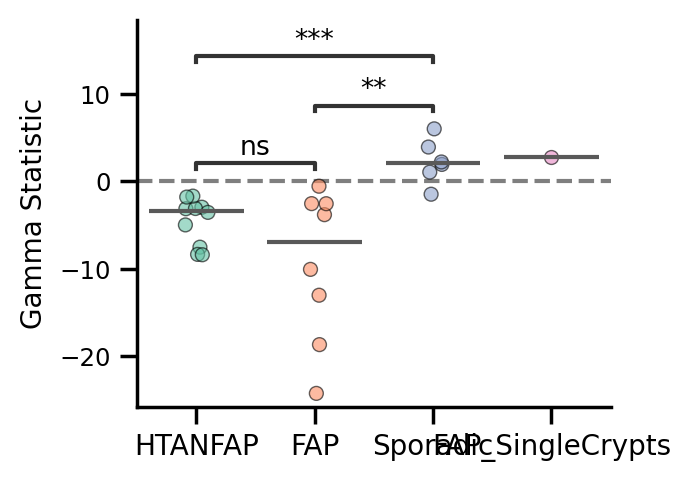

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[('HTANFAP', 'FAP'), ('HTANFAP', 'Sporadic'), ('FAP', 'Sporadic')] [0.0004341450419340197, 0.0005232308308102696, 0.21855505132608255]
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

HTANFAP vs. FAP: ***
FAP vs. Sporadic: ns
HTANFAP vs. Sporadic: ***


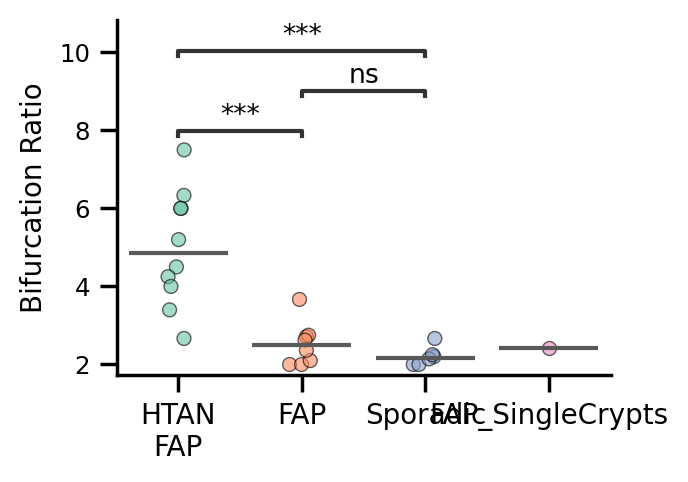

In [23]:
# fig, ax = plt.subplots(1, 2, figsize=(5,2.5))

# sns.boxplot(x='Cohort', y='gamma', palette='Set2', data=tree_stats, ax=ax[0])
# ax[0].set_ylabel('Gamma Statistic', fontsize=10)
# ax[0].set_xlabel('')
# ax[0].set_xticklabels(["HTAN\nFAP", "FAP", "Sporadic"], fontsize=10)
# ax[0].axhline(0., ls='--', color='black', alpha=0.5)

# sns.boxplot(x='Cohort', y='Rb', palette='Set2', data=tree_stats, ax=ax[1])
# ax[1].set_ylabel('Bifurcation Ratio (Rb)', fontsize=10)
# ax[1].set_xticklabels(["HTAN\nFAP", "FAP", "Sporadic"], fontsize=10)

pairs2 = [('HTANFAP', 'FAP'),
          ('HTANFAP', 'Sporadic'),
            ('FAP', 'Sporadic')]

comparisons = []
for p in pairs2:
    comparisons.append(stats.ttest_ind(tree_stats[tree_stats['Cohort']==p[0]]['gamma'], tree_stats[tree_stats['Cohort']==p[1]]['gamma']).pvalue)

print(comparisons)

format = lambda x: "ns" if x > 0.05 else "*" if x > 0.01 else "**" if x > 0.001 else "***" if x > 0.0001 else "****"
formatted_pvalues = [format(p) for p in comparisons]

plotting_parameters = {
    'y':"gamma",
    'x':'Cohort',
    'data':tree_stats,
    'order': ['HTANFAP', 'FAP', 'Sporadic', 'FAP_SingleCrypts'],
    'palette':'Set2'
}

with sns.plotting_context('notebook', font_scale = .8):
    # Create new plot
    fig, ax = plt.subplots(figsize=(3.5, 2.5), dpi=200)
    # set_scale = "set_yscale"
    # getattr(ax, set_scale)("log")

    # Plot with seaborn
    g = sns.stripplot(**plotting_parameters, zorder=1, alpha=0.6, edgecolor='black', linewidth=0.5)
        # plot the mean line
    sns.boxplot(**plotting_parameters, showmeans=False,
                meanline=True,
                meanprops={'ls': '-', 'lw': 3},
                medianprops={'visible': True},
                whiskerprops={'visible': False},
                zorder=10,
                showfliers=False,
                showbox=False,
                showcaps=False)
    # g = sns.stripplot(**plotting_parameters2, zorder=2)
    #  hue=df_jsi_grouped_by_benign_and_dysplasia['Compare_str'], data=df_jsi_grouped_by_benign_and_dysplasia, jitter=0.3, palette='Set1', alpha=0.6, edgecolor='white', linewidth=1, size=7)
    ax.set_ylabel('Gamma Statistic', fontsize=10)
    ax.set_xlabel('')
    ax.set_xticklabels(['HTANFAP', "FAP", "Sporadic", 'FAP_SingleCrypts'], fontsize=10)
    ax.axhline(0., ls='--', color='black', alpha=0.5, zorder=0)
    ax.legend().remove()

    # # Add annotations
    annotator = Annotator(ax, pairs2, **plotting_parameters)
    annotator.set_custom_annotations(formatted_pvalues)
    annotator.annotate()
    # plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

    sns.despine()  
    plt.tight_layout()
    # plt.savefig('/Users/ryanschenck/Dropbox/Projects/FAP_Project/notebooks/imgs/phylogenies/gamma_statistic.pdf', bbox_inches='tight', transparent=True)
    plt.savefig('/Users/ryanschenck/Dropbox/Projects/FAP_Project/data/single_crypt/imgs/gamma_statistic.pdf')
    plt.show()


plotting_parameters2 = {
    'y':"Rb",
    'x':'Cohort',
    'data':tree_stats,
    'order': ['HTANFAP', 'FAP', 'Sporadic', 'FAP_SingleCrypts'],
    'palette':'Set2',
}

pairs = [('HTANFAP', 'FAP'),
            ('HTANFAP', 'Sporadic'),
            ('FAP', 'Sporadic')]

comparisons = []
for p in pairs:
    comparisons.append(stats.ttest_ind(tree_stats[tree_stats['Cohort']==p[0]]['Rb'], tree_stats[tree_stats['Cohort']==p[1]]['Rb']).pvalue)

print(pairs, comparisons)
format = lambda x: "ns" if x > 0.05 else "*" if x > 0.01 else "**" if x > 0.001 else "***" if x > 0.0001 else "****"
formatted_pvalues = [format(p) for p in comparisons]


with sns.plotting_context('notebook', font_scale = .8):
    # Create new plot
    fig, ax = plt.subplots(figsize=(3.5, 2.5), dpi=200)
    # set_scale = "set_yscale"
    # getattr(ax, set_scale)("log")

    # Plot with seaborn
    # g = sns.boxplot(**plotting_parameters2, zorder=1)
    g = sns.stripplot(**plotting_parameters2, zorder=1, alpha=0.6, edgecolor='black', linewidth=0.5)

    # plot the mean line
    sns.boxplot(**plotting_parameters2, showmeans=False,
                meanline=True,
                meanprops={'ls': '-', 'lw': 3},
                medianprops={'visible': True},
                whiskerprops={'visible': False},
                zorder=10,
                showfliers=False,
                showbox=False,
                showcaps=False)
    
    #  hue=df_jsi_grouped_by_benign_and_dysplasia['Compare_str'], data=df_jsi_grouped_by_benign_and_dysplasia, jitter=0.3, palette='Set1', alpha=0.6, edgecolor='white', linewidth=1, size=7)
    ax.set_ylabel('Bifurcation Ratio', fontsize=10)
    ax.set_xlabel('')
    ax.set_xticklabels(["HTAN\nFAP", "FAP", "Sporadic", 'FAP_SingleCrypts'], fontsize=10)
    ax.legend().remove()

    # # Add annotations
    annotator = Annotator(ax, pairs, **plotting_parameters2)
    annotator.set_custom_annotations(formatted_pvalues)
    annotator.annotate()
    # plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

    sns.despine()
    plt.tight_layout()
    plt.savefig('/Users/ryanschenck/Dropbox/Projects/FAP_Project/data/single_crypt/imgs/bifurcation_ratio.pdf')
    plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[('HTANFAP', 'FAP'), ('HTANFAP', 'Sporadic'), ('FAP', 'Sporadic')] [0.0010792923757112583, 0.00023706779035796222, 0.36036086204215545]
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

HTANFAP vs. FAP: **
FAP vs. Sporadic: ns
HTANFAP vs. Sporadic: ***


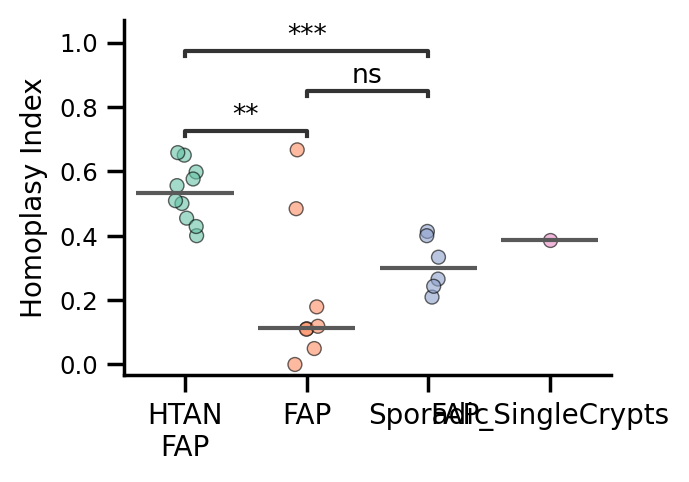

In [24]:
pairs = [('HTANFAP', 'FAP'),
            ('HTANFAP', 'Sporadic'),
            ('FAP', 'Sporadic')]

comparisons = []
for p in pairs:
    comparisons.append(stats.ttest_ind(tree_stats[tree_stats['Cohort']==p[0]]['HI'], tree_stats[tree_stats['Cohort']==p[1]]['HI']).pvalue)

format = lambda x: "ns" if x > 0.05 else "*" if x > 0.01 else "**" if x > 0.001 else "***" if x > 0.0001 else "****"
formatted_pvalues = [format(p) for p in comparisons]
print(pairs, comparisons)
plotting_parameters = {
    'y':"HI",
    'x':'Cohort',
    'data':tree_stats,
    'order': ['HTANFAP', 'FAP', 'Sporadic', 'FAP_SingleCrypts'],
    'palette':'Set2'
}

with sns.plotting_context('notebook', font_scale = .8):
    # Create new plot
    fig, ax = plt.subplots(figsize=(3.5, 2.5), dpi=200)
    # set_scale = "set_yscale"
    # getattr(ax, set_scale)("log")

    # Plot with seaborn
    g = sns.stripplot(**plotting_parameters, zorder=1, alpha=0.6, edgecolor='black', linewidth=0.5)

    # plot the mean line
    sns.boxplot(**plotting_parameters, showmeans=False,
                meanline=True,
                meanprops={'ls': '-', 'lw': 3},
                medianprops={'visible': True},
                whiskerprops={'visible': False},
                zorder=10,
                showfliers=False,
                showbox=False,
                showcaps=False)
    #  hue=df_jsi_grouped_by_benign_and_dysplasia['Compare_str'], data=df_jsi_grouped_by_benign_and_dysplasia, jitter=0.3, palette='Set1', alpha=0.6, edgecolor='white', linewidth=1, size=7)
    ax.set_ylabel('Homoplasy Index', fontsize=10)
    ax.set_xlabel('')
    ax.set_xticklabels(["HTAN\nFAP", "FAP", "Sporadic", 'FAP_SingleCrypts'], fontsize=10)
    ax.legend().remove()

    # # Add annotations
    annotator = Annotator(ax, pairs, **plotting_parameters)
    annotator.set_custom_annotations(formatted_pvalues)
    annotator.annotate()
    # plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

    sns.despine()  
    plt.tight_layout()
    plt.savefig('/Users/ryanschenck/Dropbox/Projects/FAP_Project/data/single_crypt/imgs/homoplasy_index.pdf')
    plt.show()

#### Consensus Phylogeny

/Users/ryanschenck/Dropbox/Projects/FAP_Project/data/single_crypt/phylogeny/output/phylogeny_PAUP/single_crypts_WGS_PAUPrun


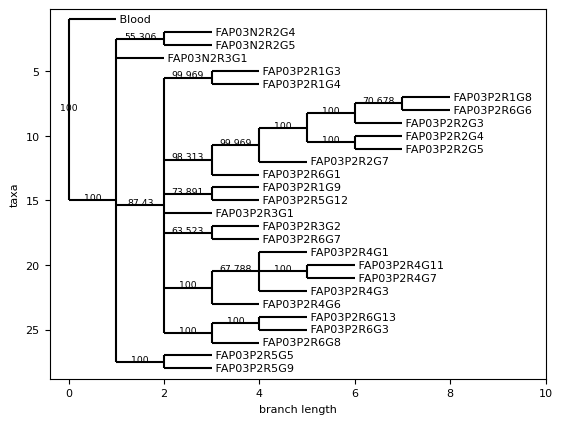

In [25]:
res_paths = glob.glob("/Users/ryanschenck/Dropbox/Projects/FAP_Project/data/single_crypt/phylogeny/output/phylogeny_PAUP/*")

for path in res_paths:
    if os.path.isdir(path):
        if path.endswith('.nex')==False:
            print(path)
            
            try:
                contree = list(Phylo.parse(f"{path}/fileref.contree50.tre", "newick"))
                Phylo.draw(contree[0])
            except:
                pass

#### Most parsimonious phylogeny

In [72]:
# Switch environment to ete3

from Bio import Phylo
from Bio.Phylo.Consensus import *

# import PyQt5
from ete3 import TreeStyle
from ete3 import Tree, NodeStyle, faces, TextFace
import numpy as np
import pandas as pd
import glob, os, re, sys
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import joblib
import pyarrow.parquet as pq
import pyarrow as pa
import seaborn as sns

from statannotations.Annotator import Annotator

font = {'size'   : 8}
plt.rc('font', **font)
plt.rcParams['pdf.fonttype'] = 42

In [121]:
def my_layout(node):
    pal_hls = sns.hls_palette(12, l=.3, s=.8).as_hex()
    colors = {'M':'#63ab91','B':'#e58463','D':'#8391b6','A':'#d380b4'}
    colors = {'M': "#f0a121", 'B': "#ce5c4a", 'dysplasia': "#8d366a", 'A': "#4d226e",'AdCa': "#4d226e", 'Blood': '#EEEEEE'}
    # colors = dict(zip(stages, pal_hls))

    scaleFactor = 1

    if node.dist!=0:
        #         node.dist = np.round(node.dist,2)
        # self.log.info(node.name, node.dist)
        driverattrdistattr = TextFace('\n'.join(node.DriverLabel), fsize= 4 *scaleFactor)
        distattr = TextFace(repr( np.round(node.dist ,0) ), fgcolor = 'black', fstyle="italic", fsize= 8 *scaleFactor)

        ### Set some attributes for both dist and support
        for attr in [driverattrdistattr, distattr]:
            attr.margin_top = 0
            attr.margin_left = 0
            attr.margin_bottom = 0
            attr.margin_right = 5
            # attr.margin_right = node.dist/75

        ### Add to the nodes
        # faces.add_face_to_node(distattr, node, column=0, position = "branch-top")
        driverattrdistattr.margin_right = 5
        faces.add_face_to_node(driverattrdistattr, node, column=1, position = "branch-top")

    if node.is_leaf():
        # If internal node, draws label with smaller font size
        plotName = node.name.replace('A001' ,'').replace('A002' ,'').replace('A014' ,'').replace('A015' ,'').replace \
            ('EP' ,'F').replace('JP' ,'G').replace('FAP03P2','').replace('FAP03N2','')
        
        if node.Stage in ['Mucosa','Benign','Dysplasia','AdCa']:
            colorhex = colors[node.Stage[0]]
        else:
            colorhex = 'black'
        name_face = TextFace(plotName, fsize=8*scaleFactor, fgcolor = colorhex, ftype="Ariel")
        name_face.border.margin = 3
        name_face.margin_left = 4

        # locFaceImg = faces.ImgFace('./neos_%s.png'%(node.Location), width=float(100), height=100)
        # locFaceImg.margin_left=5
        locFaceImg = TextFace(node.Location, fsize= 4 *scaleFactor, fgcolor = 'black', fstyle="italic")

        locFaceImg.border.margin = 3
        locFaceImg.margin_left = 4
        faces.add_face_to_node(name_face, node, column=0)
        faces.add_face_to_node(locFaceImg, node, column=0)

    #         if node.name.startswith("G"):
    #             node.name = " " + node.name
    #         elif node.name.startswith("F"):
    #             node.name = " " + node.name
    #         else:
    #             node.name = " " + node.name[4:]
    else:
        #         supportText = assign_branch_support_symbol(node.support)
        supportText = '-'

        # supportattr = TextFace(node.name, fsize= 3 *scaleFactor, fgcolor = 'black', fstyle="italic")

        # supportattr.margin_top = 0
        # supportattr.margin_left = 5
        # supportattr.margin_bottom = 0
        # supportattr.margin_right = 5

        # faces.add_face_to_node(supportattr, node, column=0, position = "branch-bottom")

    nstyle_leaf = NodeStyle()
    nstyle_leaf["vt_line_width"] = 1.5 * scaleFactor
    nstyle_leaf["hz_line_width"] = 1.5 * scaleFactor
    nstyle_leaf["vt_line_type"] = 0  # 0 solid, 1 dashed, 2 dotted

    if node.is_leaf() and node.name != "Blood":
        nstyle_leaf["size"] = 1 * scaleFactor

        parentNode = node.up
        supportlevel = parentNode.support
        nstyle_leaf["hz_line_width"] = 1 * scaleFactor
        nstyle_leaf["vt_line_width"] = 1 * scaleFactor

        nstyle_leaf["fgcolor"] = colors['dysplasia']
        nstyle_leaf["vt_line_color"] = colors['dysplasia']
        nstyle_leaf["hz_line_color"] = colors['dysplasia']
        # nstyle_leaf["shape"] = Colors.FAP_shapes[node.Stage[0]]

        nstyle_leaf["size"] = 0 * scaleFactor
        node.img_style = nstyle_leaf
    else:
        nstyle_leaf["size"] = 0 * scaleFactor
        nstyle_leaf["hz_line_width"] = 1 * scaleFactor
        nstyle_leaf["vt_line_width"] = 1 * scaleFactor

        node.set_style(nstyle_leaf)

def outputPhylogeneticTree(pt, wxs, out, path):
    scaleFactor = 1

    leafs = len(out.tree.get_leaf_names())
    HIvalue = out.HIexcludingUninformative

    ts = TreeStyle()
    ts.show_leaf_name = False # Added manually
    ts.show_branch_length = False # Added manually
    ts.show_branch_support = False # Added manually
    # ts.scale_length=1000
    ts.legend_position = 4  # Bottom Right
    ts.layout_fn = my_layout

    ts.title.add_face(TextFace("Patient: %s" % (pt.replace('EP' ,'F').replace('JP' ,'G')), fsize=10 * scaleFactor), column=0)
    titleInfo = TextFace(
        "HI = %s\nNumber samples = %s" % (np.round(float(HIvalue), 2), len(out.tree.get_leaf_names())),
        fsize=6 * scaleFactor, fstyle="italic")
    titleInfo.margin_left = 10
    ts.title.add_face(titleInfo, column=1)

    # output.treestruct.render(file_name="%%inline", w=8, units="in", tree_style=ts, dpi=1200)
    rets = out.tree.render(path + "/%s_%s_tree.pdf" % (pt, wxs), w=12, units="in", tree_style=ts,
                                 dpi=300)  # Rets is the returned tree data so it doesn't print to stdout
    # output.treestruct.show(tree_style=ts)
    # log.info("Tree saved: %s"%(out.path + "/%s_%s_tree.pdf" % (pt, wxs)))

class PhylogenyOutput:

    def __init__(self, dir, paupRun, muts):
        self.paupRun = paupRun
        self.muts = muts
        self.logfile = f"{dir}/paup.log"
        self.bsttree = f"{dir}/fileref.bestTrees.tre"
        # self.edges, self.edges_nonleaves, self.dists, self.leavesIDs = self._getBranchLengths()
        self.edges, self.edges_nonleaves, self.dists, self.leavesIDs = self._getBranchLengths()
        self.mutsOnEdge, self.mutDf = self._pullMutAssignments()
        # self.triNucDict = self._digestTriNucMuts()
        self.sams_with_driver_original_mut_mat = None
        self.driverMuts, self.driver_dict = self._getDrivers() # sets sams_with_driver_original_mut_mat dict with 'Mut_ID' key and sample ID value
        self.OutGroup = self._getOutGroup()
        self.tree = self.__pullNewick()
        self.HI, self.HIexcludingUninformative, self.informativeSites, self.uninformativeSites = self._pullPhyloStats()
        self.genomes = self._pullReconstructedNodeGenomes() # Gets ancestral node genome assignments

    def _pullPhyloStats(self):
        loglines = self._readPAUPlog()

        for idx, line in enumerate(loglines):
            line = line.lstrip().replace('\n', '')
            if line.startswith("Number of parsimony-informative characters"):
                informativeSites = line.split(' = ')[1]
            elif "characters are parsimony-uninformative" in line.lstrip():
                uninformativeSites = line.split(' ', 1)[0]
            elif line.startswith("Homoplasy index (HI)"):
                HI = line.split(" = ")[1]
            elif line.startswith("HI excluding uninformative characters"):
                HIexcludingUninformative = line.split(" = ")[1]
                # self.log.info("HI: %s"%(HI))
                # self.log.info("HI informative only: %s"%(HIexcludingUninformative))
                # self.log.info("Number of Informative Sites: %s"%(informativeSites))
                # self.log.info("Uninformative Sites: %s"%(uninformativeSites))
        return (HI, HIexcludingUninformative, informativeSites, uninformativeSites)


    def _getDrivers(self):
        driverMuts = self.muts[(self.muts["Driver"]==True) & (self.muts['Hugo_Symbol'].isin([''])==False) & (self.muts['aaChange'].isin([''])==False)].reset_index(drop=True)

        # driverMuts = driverMuts[driverMuts['PolyPhen'].str.contains("probably_damaging")]
        driverMuts["MutLabel"] = driverMuts[['Hugo_Symbol', 'aaChange']].agg(':'.join, axis=1).tolist()

        # log.info(driverMuts[['Tumor_Sample_Barcode', 'MutLabel', 'Mut_ID']])
        driver_dict = dict(zip(driverMuts["Mut_ID"], driverMuts["MutLabel"].tolist()))

        # Get all mutations that are shared in the initial mut array and the non mut array
        sams_with_driver_original_mut_mat = {}
        for idx, d in enumerate(self.paupRun.snaSet):
            if d in list(driver_dict.keys()):
                sams_with_driver_original_mut_mat.update({d:[]})
                for sample_id in  np.where(self.paupRun.mat[idx, :]==1)[0]:
                    sams_with_driver_original_mut_mat[d].append(self.paupRun.sampleIDSet[sample_id])

        self.sams_with_driver_original_mut_mat = sams_with_driver_original_mut_mat

        return( driverMuts, driver_dict )

    def _pullPAUPMutAssignments(self, loglines):
        # Get the start of this section:
        for idx, line in enumerate(loglines):
            if line.startswith("Taxon/Node"):
                startidx = idx+2 # We know it is 2 lines after 'Taxon/Node' for the start plus 1 for 0 indexing
                break
        for idx, line in enumerate(loglines[startidx: ]):
            if line.startswith("Tree length = "):
                endidx = startidx + idx
                break
        numInterleavedMutBlocks = 1 # Startidx is after the first one
        for idx, line in enumerate(loglines[startidx : endidx]):
            if line.startswith('----'):
                numInterleavedMutBlocks+=1

        return(startidx, endidx, numInterleavedMutBlocks)

    def _pullMutAssignments(self):
        loglines = self._readPAUPlog()

        startidx, endidx, numInterleavedMutBlocks = self._pullPAUPMutAssignments(loglines)
        # self.log.info("Start Mut Block = %s"%(startidx))
        # self.log.info("End Mut Block = %s"%(endidx))

        # Get list of samples to assign interleaved muts
        node_ids = []
        for l in loglines[startidx + 1:endidx]:
            if l.startswith('\n'):
                break
            else:
                node_ids.append(l.split(' ')[0])

        # Setup dictionary to hold assigned mutations
        sams = dict(zip( node_ids, [[] for i in range(0, len(node_ids))] ))

        # Gather mutations from the interleaved samples
        for l in loglines[startidx + 1:endidx]:
            if l.split(' ')[0] in node_ids:
                sams[l.split(' ')[0]].append(l.replace('\n', '').split(' ', 1)[1].lstrip())

        for s in sams:
            # Sanity check the number of chunks that should be present
            assert len(sams[s])==numInterleavedMutBlocks, "Sample %s Number of assigned mutations is incorrect. Assigned = %s, Expected = %s" % (s, len(sams[s]), numInterleavedMutBlocks)
            # Turn muts into array
            combine_muts = np.asarray([int(val) for val in ''.join(sams[s])])
            # Sanity check that the assigned muts are equal to the input muts
            assert combine_muts.shape[0]==len(self.paupRun.snaSet), "Mutations are not equal to those input to PAUP."
            sams[s] = combine_muts

        allMutsOnEdge = dict.fromkeys(sams)
        for s in sams:
            allMutsOnEdge[s] = np.where(sams[s]==1)[0]

        # Build a Pandas dataframe with every mutation with the following information:
        # MutID
        # MutIDX
        # Which samples it's present in OG data
        # Which node it's assigned to in the phylogeny data

        muts = self.paupRun.snaSet
        mutidx = [i for i in range(0,len(muts))]
        samplesWithMut = []
        nodesWithMutAssigned = []
        for mut in mutidx:
            tmp_sample_list = []
            for s in node_ids:
                assignedMuts = sams[s]
                if assignedMuts[mut]==1:
                    tmp_sample_list.append(s)
            nodesWithMutAssigned.append(', '.join(tmp_sample_list))
            assert len(tmp_sample_list)>0, "Mutation not found in any samples"

            tmp_sample_list = []
            for idx, s in enumerate(self.paupRun.sampleIDSet):
                if self.paupRun.mat[mut, idx] == 1:
                    tmp_sample_list.append(s)

            samplesWithMut.append(', '.join(tmp_sample_list))
            assert len(tmp_sample_list)>0, "Mutation not found in any samples"

        mutDf = pd.DataFrame({"Mut":muts, "MutIDX":mutidx, "SamplesWithMut":samplesWithMut, "MutAssignment":nodesWithMutAssigned})

        # driverList = []
        # for key in mutDf['Mut'].tolist():
        #     if key in list(self.driver_dict.keys()):
        #         driverList.append(self.driver_dict[key])
        #     else:
        #         driverList.append("")

        # mutDf['DriverID'] = driverList

        # mutDf.to_csv(self.path + "/mut_node_assignments_all_muts.tsv", sep="\t", index=False)
        # driverDf = mutDf[mutDf['DriverID']!=""]
        # driverDf.to_csv(self.path + "/mut_node_assignments_drivers_only.tsv", sep="\t", index=False)

        return (allMutsOnEdge, mutDf) # Returns all mutations in a list, and all mutations for that node that are private and shared, not unique to that node though

    def _getOutGroup(self):
        loglines = self._readPAUPlog()
        for line in loglines:
            if '*' in line and 'P A U P *' not in line:
                normal = line.split('*')[0].split(' (')[0].replace(' ', '_')
        return (normal)

    def __pullNewick(self):
        with open(self.bsttree, "r") as inputf:
            trees = [l.replace('\n', '') for l in inputf][0]
            # TODO need to get the tree that the log file is referencing
        t = Tree(trees, format=1)
        print(t) # Print the tree. Leaving this to give a good visual output
        outgroup_point = t.get_midpoint_outgroup()
        t.set_outgroup = t.search_nodes(name=self.OutGroup)[0]
        superRoot = self.edges['Blood']

        for node in t.traverse():
            node.support = 5.
            if node.is_leaf() == False: # Assign Branch Supports
                node.name = "-1"
        
        seen = []
        for node in t.iter_leaves():  # Iterating from the leaves to the root
            print(node.name)
            seen.append(node.name)
            node.dist = int(self.dists[node.name])
            child_name = node.name  # Save child (this node) name next parent
            desc_node = node.up
            while desc_node:
                if desc_node.name == "-1":
                    desc_node.name = self.edges[child_name]
                child_name = desc_node.name  # Save child name next parent
                desc_node = desc_node.up

        supports = self._getBranchSupports()
        for node in t.traverse():
            if node.is_leaf() == False:
                node.dist = self.dists[node.name]
            else:
                try:
                    brsupport = supports[','.join([self.leavesIDs[n.name] for n in node.get_descendants() if n.name!= '']) ]
                except KeyError:
                    brsupport = 5.
                node.support = float(brsupport)
                # print(node.name)
                # print(node.support)

        for node in t.traverse():
            if node.name != 'Blood':
                allMuts = self.mutsOnEdge[node.name]
            else:
                allMuts = np.asarray([])
            node.add_feature("AllMuts", allMuts)
            node.add_feature("UniqueMuts", [])
            node.add_feature("DriverLabel", [])
            # node.add_feature("Trinucs", [])
            node.add_feature("TrinucCounts", [])
            node.add_feature("Neoepitopes", [])
            node.add_feature("Location", "")
            node.add_feature("Stage", "")
            node.add_feature("NodeSampleName", "")

            if node.is_leaf() and node.name != "Blood":
                try:
                    dataName = self.paupRun.sampleDict[node.name]
                except KeyError:
                    print( "Key Error %s" % (node.name) )
                    dataName = node.name
                node.NodeSampleName = dataName
                # node.Stage = self.muts[self.muts['Tumor_Sample_Barcode'] == dataName]['Stage'].tolist()[0]
                # node.Location = self.muts[self.muts['Tumor_Sample_Barcode'] == dataName]['Location'].tolist()[0]

            possibleNeoantigens = []
            for midx in node.AllMuts:
                mutid = self.paupRun.snaSet[midx]
                mutidlt = mutid.split('_')  # Split to create Neoepitope ID
                mutNeoID = '_'.join([mutidlt[0], mutidlt[1], mutidlt[3], mutidlt[4]])
                altinmut = mutid.split('_')[len(mutid.split('_')) - 1]
                refinmut = mutid.split('_')[len(mutid.split('_')) - 2]
                if len(altinmut) == 1 and altinmut != "-" and refinmut != "-":  # Only single point mutations for neoepitopes
                    node.Trinucs.append(self.triNucDict[mutid])

                    if self._isUniqueMut(midx, node):
                        possibleNeoantigens.append(mutNeoID)
                
                if self._isUniqueMut(midx, node):
                    node.UniqueMuts.append(midx)

                    mutid = '_'.join(mutid.split('_')[0:-1])
                    if mutid in self.driverMuts['Mut_ID'].tolist():
                        driver_to_plot = ["APC","KRAS","SMAD4","FBXW7","HUWE1","SMARCA4","RUNX1","RBM10","TP53","KMT2D"]
                        if node.is_leaf():
                            # ccf_value = self._get_mut_ccf(mutid, node.NodeSampleName) # Sample NodeName is needed in the correct format...rather than node.name
                            try:
                                # label = self.driver_dict[mutid] + ":" + str(np.round(ccf_value, 2))
                                label = self.driver_dict[mutid]
                            except TypeError as exc:
                                # label = self.driver_dict[mutid] + ":" + str(ccf_value)
                                label = self.driver_dict[mutid]
                        else:
                            label = self.driver_dict[mutid]
                        # if label.split(':')[0] in driver_to_plot:
                        node.DriverLabel.append(label)

        #     wb = 0
        #     sb = 0
        #     neoidlist = self.neos['Mut_ID'].tolist()
        #     binderlist = self.neos[24].tolist()
        #     for idx, n in enumerate(neoidlist):
        #         if n in possibleNeoantigens:
        #             bstrength = binderlist[idx]
        #             if bstrength == 'WB':
        #                 wb += 1
        #             elif bstrength == 'SB':
        #                 sb += 1
        #             else:
        #                 pass
        #     node.Neoepitopes = [wb + sb, wb, sb]
        #     # print(node.name, node.Neoepitopes)

            # trinucCounts = []
            # for trinuc in allTrinucs:
            #     tc = node.Trinucs.count(trinuc)
            #     trinucCounts.append(tc)
            # node.TrinucCounts = trinucCounts

        return (t)
    
    def _pullReconstructedNodeGenomes(self):
        loglines = self._readPAUPlog()
        starts = []
        ends = []
        readblock = False
        readingchunk = False
        for idx, line in enumerate(loglines):
            if line.startswith("Data matrix and reconstructed states for internal nodes:"):
                startidx = idx+1
                readblock = True
            elif line.startswith("Tree length = "):
                endidx = idx
                readblock = False
                break
            
            if readblock:
                if line.startswith("---------------------------------------------------------------------------------------------------"):
                    chunckstart = idx+1
                    starts.append(chunckstart)
                    readingchunk = True
                elif line.startswith("\n") and readingchunk==True:
                    # Reached chunk end
                    readingchunk = False
                    chunckend = idx
                    ends.append(chunckend)
        
        genomes = {}
        for i in range(0, len(starts)):
            c = loglines[starts[i]:ends[i]]
            c = [l.replace('\n', '').split(' ') for l in c]
            c = [l for l in c if l != ['']]
            for data in c:
                if data[0] not in list(genomes.keys()):
                    genomes.update({data[0]:['', None]})
                genomes[data[0]][0] += data[-1]
        
        for g in genomes:
            genomes[g][1] = np.zeros(len(genomes[g][0])).astype(int)
            for idx, char in enumerate(genomes[g][0]):
                if char == '0':
                    genomes[g][1][idx] = 0
                elif char == '1':
                    genomes[g][1][idx] = 1
                else:
                    sys.exit('Error! Character not 0/1')
            genomes[g].append(np.where(genomes[g][1]==1)[0])
        
        reconstructed = self._assignMuts(genomes)

        return(reconstructed)

    def _assignMuts(self, genomes):
        reconstructed = {}
        for g in genomes:
            # Get mut ids for this genome
            mutids = []
            for idx, val in enumerate(genomes[g][2]):
                mutids.append(self.paupRun.snaSet[idx])
            ret = self.muts[self.muts['Mut_ID'].isin(mutids)]
            reconstructed.update(   {g:ret}   )
        
        return(reconstructed)

    # def _get_mut_ccf(self, mutid, sample_id):
    #     ccf_val = self.muts[(self.muts['Mut_ID']==mutid) & (self.muts['Tumor_Sample_Barcode']==sample_id)]['ccf_expected_copies'].tolist()[0]
    #     return(ccf_val)

    def _isUniqueMut(self, mutidx, node):
        newnode = node.up
        if mutidx in newnode.AllMuts:
            return(False)
        while newnode:
            if mutidx in newnode.AllMuts:
                return (False)
            newnode = newnode.up
        return (True)
    
    def _readPAUPlog(self):
        with open(self.logfile, 'r') as logfileinput:
            loglines = logfileinput.readlines()
        return(loglines)
    
    def _getBranchSupports(self):
        loglines = self._readPAUPlog()

        startsearch = False
        startidx = 0
        endidx = 0
        for idx, line in enumerate(loglines):
            if line.startswith("Bipartitions found in one or more trees and frequency of occurrence (bootstrap support values):"):
                startsearch = True
            if startsearch and line.startswith("----"):
                startidx = idx
                startsearch = False
                break
        for idx, line in enumerate(loglines[startidx + 1:]):
            if "groups at (relative) frequency less than 5% not shown" in line:
                endidx = startidx + idx + 1
                break

        nodeSupports = {}
        for l in loglines[startidx + 1:endidx]:
            l = l.replace('\n', '').lstrip().replace(' (', '(').replace('%','')
            l = l.split(' ')
            ret = []
            for entry in l:
                if entry != '':
                    ret.append(entry)
            if len(ret)==3:
                nodeIds = ','.join([str(i) for i in range(1, len(ret[0])+1) if ret[0][i-1]=="*"]) # 1 indexed
                support = float(ret[2])
                nodeSupports.update({nodeIds : support})

        return ( nodeSupports )

    def _getBranchLengths(self):
        loglines = self._readPAUPlog()

        startsearch = False
        startidx = 0
        endidx = 0
        for idx, line in enumerate(loglines):
            if line.startswith("Branch lengths and linkages for tree"):
                startsearch = True
            if startsearch and line.startswith(
                    "-------------------------------------------------------------------------"):
                startidx = idx
                startsearch = False
                break
        for idx, line in enumerate(loglines[startidx + 1:]):
            if line.startswith("-------------------------------------------------------------------------"):
                endidx = startidx + idx + 1
                break

        node = []
        nodeParent = []
        assignedBranchLengths = []
        for l in loglines[startidx + 1:endidx]:
            l = l.replace('\n', '').lstrip().replace(' (', '(')
            l = l.split(' ')
            ret = []
            for entry in l:
                if entry != '':
                    ret.append(entry)
            node.append(ret[0])
            nodeParent.append(ret[1])
            assignedBranchLengths.append(ret[2])

        edges = dict(zip([self._getNodeName(n) for n in node], nodeParent))  # May need to change keys
        dists = dict(zip([self._getNodeName(n) for n in node], assignedBranchLengths))
        edges_nonleaves = dict(zip([self._getNodeID(n) for n in node], nodeParent))
        leavesID = dict(zip( [self._getNodeName(n) for n in node] ,  [self._getNodeID( n ) for n in node] ))

        return (edges, edges_nonleaves, dists, leavesID)
    
    def _digestTriNucMuts(self):
        # Create dictionary for trinucleotides
        complement = {'A': 'T', 'C': 'G', 'G': 'C', 'T': 'A'}
        if self.paupRun.ptmuts.columns.shape[0]==3:
            theseMuts = self.muts[(self.muts['Mut_ID'].isin(self.paupRun.ptmuts['Mut_ID'].tolist())) & (self.muts['Patient']==self.paupRun.ptmuts['Patient'].tolist()[0])]
        else:
            theseMuts = self.paupRun.ptmuts
        refs = theseMuts['Reference_Allele'].tolist()
        alts = theseMuts['Tumor_Seq_Allele2'].tolist()
        trinucsinsamples = theseMuts['flanking_bps'].tolist()
        mutlabs = theseMuts["Mut_ID"].tolist()

        trinucDict = {}
        for idx, sna in enumerate(trinucsinsamples):
            if len(sna) == 3 and refs[idx] != '-' and alts[idx] != '-':
                mid = mutlabs[idx]

                ref = refs[idx]
                alt = alts[idx]
                trnc = sna

                if ref in ['C', 'T']:
                    mt = trnc[0] + "[" + ref + ">" + alt + "]" + trnc[2]
                else:
                    mt = complement[trnc[0]] + "[" + complement[ref] + ">" + complement[alt] + "]" + complement[trnc[2]]

                trinucDict.update({mid: mt})
        return(trinucDict)
    
    def _getNodeName(self, n):
        if "(" in n:
            return (n.split('(')[0])
        else:
            return (n)

    def _getNodeID(self, n):
        if "(" in n:
            return (n.split('(')[1].split(')')[0])
        else:
            return (n)

In [131]:
# Give samples a 'Mut_ID'
maf = pd.read_csv('../data/single_crypt/FAP03_sgWGS_maf_all_SSNVs_consensus_filtered.csv', sep=',')
maf.head()
maf['Mut_ID'] = maf['Chromosome'] + '_' + maf['Start_Position'].astype('str') + '_' + maf['End_Position'].astype('str') + '_' + maf['Reference_Allele'] + '_' + maf['Tumor_Seq_Allele2']

def get_cancer_drivers(driverfile="/Users/ryanschenck/Dropbox/Projects/FAP_Project/data/CancerDrivers/PanCanDrivers_Cell2018.csv"):
    x = pd.read_csv(driverfile,skiprows=3)
    listofgenes = x["Gene"]
    return (list(set(listofgenes)))


drivers = get_cancer_drivers()
drivers = drivers + ['MAP2', 'HSPG2','PTPRT', 'FAT3','BCL11B', 'ARID1B','AFF3','LRP1B','PABPC1','KIF1A']

# Final Driver Call
# maf['Driver'] = path_test['Consensus_Pathogenic']

maf['DriverGene'] = maf['Hugo_Symbol'].apply(lambda x: True if x in drivers else False)
maf['Driver'] = maf.apply(lambda x: True if (x['Variant_Classification'] in ['Nonsense_Mutation', 'Missense_Mutation','Frame_Shift_Ins', 'Frame_Shift_Del', 'Splice_Site','Translation_Start_Site'] and x['DriverGene']==True) else False, axis=1)

/var/folders/cn/mkqyq2g10szdj9fxtbflh8ww0000gq/T/ipykernel_31775/2170489939.py:2: DtypeWarning: Columns (8,9,10,11,22,23,31) have mixed types. Specify dtype option on import or set low_memory=False.
  maf = pd.read_csv('../data/single_crypt/FAP03_sgWGS_maf_all_SSNVs_consensus_filtered.csv', sep=',')


In [132]:
import joblib

res_paths = glob.glob("/Users/ryanschenck/Dropbox/Projects/FAP_Project/data/single_crypt/phylogeny/output/phylogeny_PAUP/*")

all_res = joblib.load("/Users/ryanschenck/Dropbox/Projects/FAP_Project/data/single_crypt/phylogeny/output/phylogeny_PAUP/PAUPRunAllSams_singlecrypts.joblib")

res = []
for path in res_paths:
    if os.path.isdir(path):
        if path.endswith('.nex')==False and path.endswith('.joblib')==False:
            print(path)
            
            # contree = list(Phylo.parse(f"{path}/fileref.contree50.tre", "newick"))
            best = list(Phylo.parse(f"{path}/fileref.bootMajRule.withDists.tre", "newick"))
            if len(best)>0:
                pt = path.split('/')[-1].split('_')[0]
                wxs = path.split('/')[-1].split('_')[1]
                best = PhylogenyOutput(path, all_res['single_crypts'], maf)
                
                outputPhylogeneticTree(pt, wxs, best, f"{path}/")
                joblib.dump(best, f"{path}/reconstructed_tree.joblib")
                res.append(best)
                
            else:
                print("No tree found")

/Users/ryanschenck/Dropbox/Projects/FAP_Project/data/single_crypt/phylogeny/output/phylogeny_PAUP/single_crypts_WGS_PAUPrun

   /-Blood
  |
  |            /-FAP03N2R2G4
  |         /-|
  |        |   \-FAP03N2R3G1
  |        |
  |        |            /-FAP03P2R1G3
  |        |         /-|
  |        |        |   \-FAP03P2R1G4
  |        |        |
  |        |        |         /-FAP03P2R1G9
  |        |        |      /-|
  |        |        |     |   \-FAP03P2R5G12
  |        |      /-|   /-|
  |        |     |  |  |  |      /-FAP03P2R6G13
  |        |     |  |  |  |   /-|
  |        |     |  |  |   \-|   \-FAP03P2R6G3
  |        |     |  |  |     |
  |        |     |  |  |      \-FAP03P2R6G8
  |        |     |   \-|
  |      /-|     |     |         /-FAP03P2R4G1
  |     |  |     |     |      /-|
--|     |  |     |     |     |   \-FAP03P2R4G3
  |     |  |     |     |   /-|
  |     |  |     |     |  |  |   /-FAP03P2R4G11
  |     |  |     |      \-|   \-|
  |     |  |     |        |     

In [130]:
def get_cancer_drivers(driverfile="/Users/ryanschenck/Dropbox/Projects/FAP_Project/data/CancerDrivers/PanCanDrivers_Cell2018.csv"):
    x = pd.read_csv(driverfile,skiprows=3)
    listofgenes = x["Gene"]
    return (list(set(listofgenes)))


drivers = get_cancer_drivers()
drivers = drivers + ['MAP2', 'HSPG2','PTPRT', 'FAT3','BCL11B', 'ARID1B','AFF3','LRP1B','PABPC1','KIF1A']

# Final Driver Call
# maf['Driver'] = path_test['Consensus_Pathogenic']

maf['DriverGene'] = maf['Hugo_Symbol'].apply(lambda x: True if x in drivers else False)
maf['Driver'] = maf.apply(lambda x: True if (x['Variant_Classification'] in ['Nonsense_Mutation', 'Missense_Mutation','Frame_Shift_Ins', 'Frame_Shift_Del', 'Splice_Site','Translation_Start_Site'] and x['DriverGene']==True) else False, axis=1)

In [58]:
maf['aaChange']#.columns

0        p.R1432X
1           p.K7M
2         p.I178V
3         p.S126N
4             NaN
           ...   
83613         NaN
83614         NaN
83615         NaN
83616         NaN
83617         NaN
Name: aaChange, Length: 83618, dtype: object

## Looking at monoclonal conversions

In [137]:
for s, sdf in maf.groupby('Tumor_Sample_Barcode'):
    print(s, sdf['VAF'].max(), sdf[sdf['VAF']>=0.5].shape[0])

FAP03_N2_R2_G4 0.857143 42
FAP03_N2_R2_G5 0.75 142
FAP03_N2_R3_G1 0.875 23
FAP03_P2_R1_G3 0.923077 110
FAP03_P2_R1_G4 1.0 1032
FAP03_P2_R1_G8 1.0 1738
FAP03_P2_R1_G9 1.0 1140
FAP03_P2_R2_G3 1.0 1201
FAP03_P2_R2_G4 1.0 238
FAP03_P2_R2_G5 1.0 624
FAP03_P2_R2_G7 1.0 448
FAP03_P2_R3_G1 0.916667 121
FAP03_P2_R3_G2 0.916667 168
FAP03_P2_R4_G1 1.0 560
FAP03_P2_R4_G11 1.0 692
FAP03_P2_R4_G3 1.0 900
FAP03_P2_R4_G6 1.0 870
FAP03_P2_R4_G7 1.0 960
FAP03_P2_R5_G12 1.0 974
FAP03_P2_R5_G5 1.0 1584
FAP03_P2_R5_G9 1.0 559
FAP03_P2_R6_G1 0.875 191
FAP03_P2_R6_G13 1.0 613
FAP03_P2_R6_G3 0.956522 124
FAP03_P2_R6_G6 1.0 775
FAP03_P2_R6_G7 0.875 224
FAP03_P2_R6_G8 1.0 556


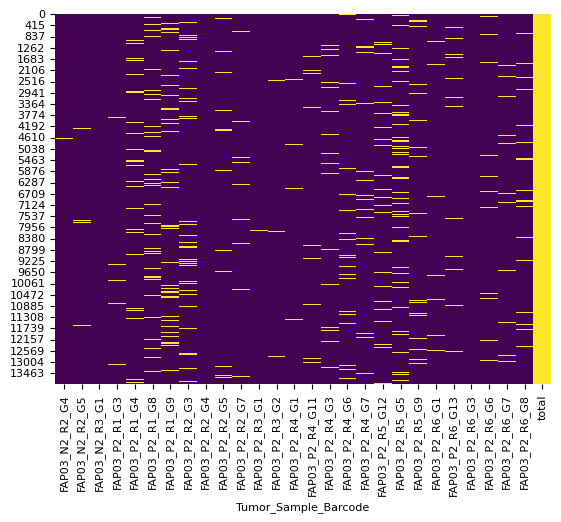

In [180]:
clonal = maf[maf['VAF']>=0.5]

forheatmap = clonal[['Tumor_Sample_Barcode','VAF', 'Mut_ID']].pivot_table(index='Mut_ID', columns='Tumor_Sample_Barcode', values='VAF', fill_value=0).reset_index(drop=True)
# Swap all values > 0 to 1
for col in forheatmap.columns:
    forheatmap[col] = forheatmap[col].apply(lambda x: 1 if x>0 else 0)

# Sort by number of samples by row sum
forheatmap['total'] = forheatmap.sum(axis=1)

private = forheatmap[forheatmap['total']==1]

# forheatmap = forheatmap.sort_values('total', ascending=False).drop('total', axis=1)

sns.heatmap(private, cmap='viridis', cbar=False)
plt.show()

In [195]:
clonal = maf[maf['VAF']>=0.5]

forheatmap = clonal[['Tumor_Sample_Barcode','VAF', 'Mut_ID']].pivot_table(index='Mut_ID', columns='Tumor_Sample_Barcode', values='VAF', fill_value=0).reset_index(drop=True)
# Swap all values > 0 to 1
for col in forheatmap.columns:
    forheatmap[col] = forheatmap[col].apply(lambda x: 1 if x>0 else 0)

# Sort by number of samples by row sum
forheatmap['total'] = forheatmap.sum(axis=1)

private = forheatmap[forheatmap['total']==1]

# Total number of mutations in clonal
total = clonal.shape[0]

# Total number of mutations that are private (where row sums to 1)
private_total = private.shape[0]

# Total number of mutations that are shared betwen 2, 3, 4, 5... samples
vals = dict(zip(range(2, forheatmap.shape[1]), [forheatmap[forheatmap['total']==i].shape[0] for i in range(2, forheatmap.shape[1])]))
vals.update({1:private_total})
fraction_monoclonal_converged = pd.DataFrame(vals, index=['Count']).T
fraction_monoclonal_converged = fraction_monoclonal_converged.sort_index(ascending=True)
fraction_monoclonal_converged['Frac'] = fraction_monoclonal_converged['Count']/total


forheatmapall = maf[['Tumor_Sample_Barcode','VAF', 'Mut_ID']].pivot_table(index='Mut_ID', columns='Tumor_Sample_Barcode', values='VAF', fill_value=0).reset_index(drop=True)
# Swap all values > 0 to 1
for col in forheatmapall.columns:
    forheatmapall[col] = forheatmapall[col].apply(lambda x: 1 if x>0 else 0)

# Sort by number of samples by row sum
forheatmapall['total'] = forheatmapall.sum(axis=1)

private = forheatmapall[forheatmapall['total']==1]

# Total number of mutations in clonal
totalall = forheatmapall.shape[0]

# Total number of mutations that are private (where row sums to 1)
private_total = private.shape[0]

# Total number of mutations that are shared betwen 2, 3, 4, 5... samples
vals = dict(zip(range(2, forheatmapall.shape[1]), [forheatmapall[forheatmapall['total']==i].shape[0] for i in range(2, forheatmapall.shape[1])]))
vals.update({1:private_total})
fraction_all = pd.DataFrame(vals, index=['Count']).T
fraction_all = fraction_all.sort_index(ascending=True)
fraction_all['Frac'] = fraction_all['Count']/totalall

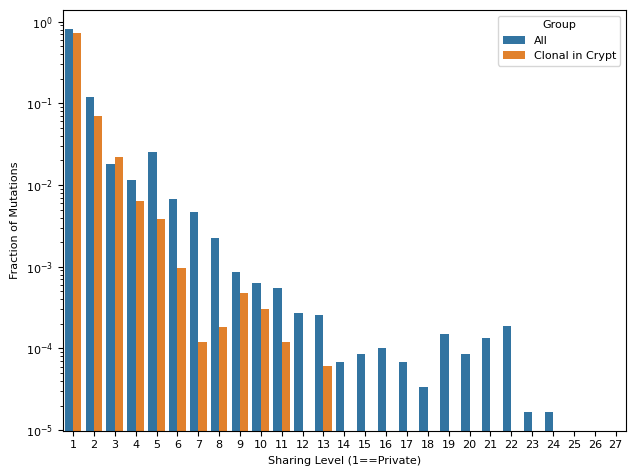

In [203]:
fraction_all['Group'] = 'All'
fraction_monoclonal_converged['Group'] = 'Clonal in Crypt'

# Combine and plot barplots
fraction = pd.concat([fraction_all, fraction_monoclonal_converged])

sns.barplot(x=fraction.index, y='Frac', data=fraction, hue='Group')
plt.yscale('log')
plt.xlabel('Sharing Level (1==Private)')
plt.ylabel('Fraction of Mutations')
plt.tight_layout()
plt.show()

Tumor_Sample_Barcode,FAP03_N2_R2_G4,FAP03_N2_R2_G5,FAP03_N2_R3_G1,FAP03_P2_R1_G3,FAP03_P2_R1_G4,FAP03_P2_R1_G8,FAP03_P2_R1_G9,FAP03_P2_R2_G3,FAP03_P2_R2_G4,FAP03_P2_R2_G5,...,FAP03_P2_R5_G12,FAP03_P2_R5_G5,FAP03_P2_R5_G9,FAP03_P2_R6_G1,FAP03_P2_R6_G13,FAP03_P2_R6_G3,FAP03_P2_R6_G6,FAP03_P2_R6_G7,FAP03_P2_R6_G8,total
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1.0
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1.0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1.0
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13886,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
13887,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1.0
13888,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
13889,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,2.0
